# Homework 4 Diffusion Models

Instructions: Click **Copy to drive** at the top and enter your solutions, the code has been tested on Colab.

Submission: please upload your completed solution **.ipynb file and printed PDF file** to Gradescope
_________

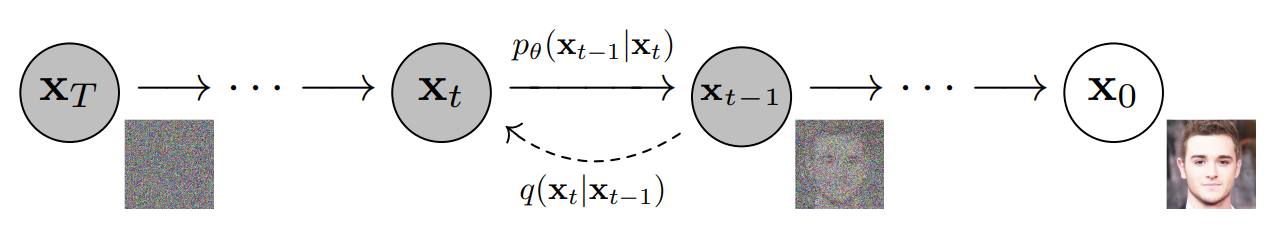

Illustration of the diffusion process. Figure from [1].

Material in this homework are adapted from [1] and [2] and [3].

[1] Jonathan Ho, Ajay Jain, and Pieter Abbeel. “Denoising diffusion probabilistic models”. _Advances in Neural Information Processing Systems_ 33 (2020), pp. 6840–6851.

[2] Jascha Sohl-Dickstein et al. “Deep unsupervised learning using nonequilibrium thermodynamics”. _International Conference on Machine Learning_. PMLR. 2015, pp. 2256–2265.

[3] Dhariwal, Prafulla, and Alexander Nichol. "Diffusion models beat gans on image synthesis." _Advances in Neural Information Processing Systems_ 34 (2021): 8780-8794.

# Problem 1: (10 Points)

## Introduction (Please read)
--------------------------

  A diffusion model is a type of latent variable generative model where the generative process is defined to be a Markov process. See figure. The generative process (from left to right) resembles a _gradual denoising_ process, where $x_T$ is random noise drawn from a Gaussian distribution, and $x_0$ is drawn from the data distribution.

$$p(x_T) = \mathbf{N}(x_T ; \mathbf{0}, \mathbf{I})$$

  The **forward process** is a Markov process $q$. This is _known/given_:

$$q(x_t | x_{t-1} ) = \mathbf{N} (x_t ;  \sqrt{\alpha_t} x_{t-1} , (1 - \alpha_t) \mathbf{I}) $$

#### Some clarifications regarding notation:
* The $\mathbf{N}$ notation means that $x_t$ is normally distributed with mean $\sqrt{\alpha_t} x_{t-1}$ and covariance matrix $(1 - \alpha_t \mathbf){I}$.

* $x_t$ are vectors.


Read tutorial from https://arxiv.org/pdf/2403.18103 and answer:

**Question:**
Prove that using $ \sqrt{\alpha_t} $ as a scaling factor ensure that the variance of the transition distribution $ q(x_t | x_{t-1}) $ remains preserved and does not explode or vanish after many iterations.


**SOLUTION** : 

Now to prove using $ \sqrt{\alpha_t} $ as a scaling factor ensures that the variance of the transition distribution $ q(x_t | x_{t-1}) $ remains preserved and does not explode or vanish after many iterations, we should consider the setup of a diffusion model.

In diffusion models we gradually add noise to an image $ x_0 $ through a series of time steps $ t = 0, 1, 2, \dots, T $. The goal is to learn how to reverse this process starting from noise and denoising it step by step.

So, We define the process of transitioning from $ x_{t-1} $ to $ x_t $ as follows:

1. At each step $ t $, we add Gaussian noise to $ x_{t-1} $ according to a distribution $ q(x_t | x_{t-1}) $.
2. The distribution $ q(x_t | x_{t-1}) $ has the form:

$q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t} x_{t-1}, (1-\alpha_t) I)$

Where:
- $ \alpha_t $ is a scalar factor that controls the amount of noise added at each step.
- $ I $ is the identity matrix (since the noise is isotropic, i.e., Gaussian noise with the same variance in all directions).
- $ \sqrt{\alpha_t} $ scales the value of $ x_{t-1} $, and $ (1-\alpha_t) $ controls the variance of the noise added to $ x_{t-1} $.


*Now what we want to prove that choosing $ \sqrt{\alpha_t} $ as the scaling factor ensures that the variance of the transition distribution does not explode or vanish as we iterate through multiple steps.*

*Here is it as follows:*

1. **Start with the transition from $ x_{t-1} $ to $ x_t $:**
   The transition $ q(x_t | x_{t-1}) $ is given by the Gaussian distribution:
   $
   q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t} x_{t-1}, (1-\alpha_t) I)
   $
   This tells us that:
   $
   \mathbb{E}[x_t | x_{t-1}] = \sqrt{\alpha_t} x_{t-1}
   $
   and the covariance matrix of the transition is:
   $
   \text{Cov}(x_t | x_{t-1}) = (1-\alpha_t) I
   $

2. **Consider the variance at each step:**
   So to ensure that the variance of $ x_t $ does not explode or vanish as $ t $ increases we need to track how the variance of the state evolves over time.

   Starting from $ x_0 $ we iterate through the time steps $ t = 1, 2, \dots, T $, where at each step $ t $ the value of $ x_t $ depends on the previous state $ x_{t-1} $ and the added noise.

   - The expected value $ \mathbb{E}[x_t] $ evolves as $ x_t = \sqrt{\alpha_t} x_{t-1} $.
   - The variance at each step is determined by the added noise, which is governed by $ (1 - \alpha_t) I $ at each step.

3. **Calculate the variance after multiple steps:**
   Now Let’s recursively compute the variance of $ x_t $ after $ t $ steps. Starting with $ x_0 $ (which has variance $ \sigma_0^2 $), we get:

   - For $ t = 1 $ the variance of $ x_1 $ is:
     $
     \text{Var}(x_1) = \text{Var}(\sqrt{\alpha_1} x_0 + \epsilon_1) = \alpha_1 \text{Var}(x_0) + (1 - \alpha_1)
     $
     where $ \epsilon_1 \sim \mathcal{N}(0, (1 - \alpha_1) I) $.

   - For $ t = 2 $ the variance of $ x_2 $ is:
     $
     \text{Var}(x_2) = \text{Var}(\sqrt{\alpha_2} x_1 + \epsilon_2) = \alpha_2 \text{Var}(x_1) + (1 - \alpha_2)
     $
     Substituting the variance of $ x_1 $:
     $
     \text{Var}(x_2) = \alpha_2 \left( \alpha_1 \text{Var}(x_0) + (1 - \alpha_1) \right) + (1 - \alpha_2)
     $

   Continuing this process recursively the variance of $ x_t $ can be expressed as:
   $
   \text{Var}(x_t) = \prod_{i=1}^{t} \alpha_i \text{Var}(x_0) + \sum_{i=1}^{t} \prod_{j=i+1}^{t} \alpha_j (1 - \alpha_i)
   $
   This expression shows how the variance evolves over time.

4. **Preservation of variance:**
   Now to ensure that the variance doesn't explode or vanish we require that $ \alpha_t $ is chosen such that the variance remains stable over time. A typical choice for $ \alpha_t $ is to have $ \alpha_t $ decrease smoothly from 1 to a small value as $ t $ increases ensuring that the variance doesn't grow too quickly.

   Specifically, the term $ \sqrt{\alpha_t} $ ensures that at each step the effect of the previous state $ x_{t-1} $ is scaled down in a controlled manner preventing the variance from growing exponentially. The noise variance $ (1-\alpha_t) $ is chosen such that while noise is added it does not cause the total variance to increase uncontrollably.

### Hence Proved

Using $ \sqrt{\alpha_t} $ as the scaling factor ensures that the contribution of the previous state $ x_{t-1} $ to $ x_t $ decreases gradually as $ t $ increases while the noise term remains manageable. This prevents the variance from either exploding or vanishing preserving the stability of the diffusion process over many iterations. Therefore, using $ \sqrt{\alpha_t} $ as a scaling factor ensure that the variance of the transition distribution $ q(x_t | x_{t-1}) $ remains preserved and does not explode or vanish after many iterations.

# Problem 2: Approximating a synthetic distribution using Diffusion (60 points)
**Make sure to use GPU. Most of the code is already written. You only need to fill in the parts that say "YOUR CODE HERE".**

In [1]:
#check GPU status
!nvidia-smi

Mon Nov 11 20:42:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          On  |   00000000:17:00.0 Off |                    0 |
| N/A   65C    P0            287W /  300W |   61743MiB /  81920MiB |     90%   E. Process |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm
import seaborn as sns

### 2.0 Data Download
The training data: `train_synthetic-5D.pth` and test data: `test_synthetic-5D.pth
` are in the `Homework` section of the [`Piazza Resources`](https://piazza.com/bu/fall2024/ec523/resources). Download this to your home directory and load it. After loading, we plot the data and visualize the clusters.

X: torch.Size([15000, 5])


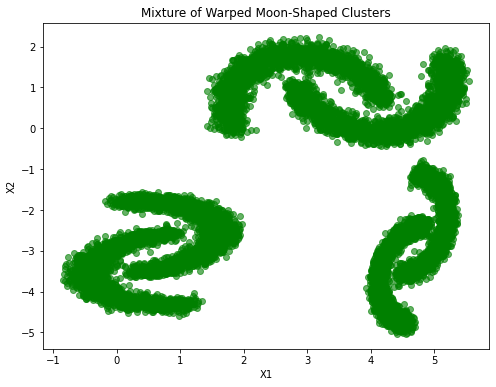

In [3]:
# Load data
data_path = "train_synthetic-5D.pth"
X = torch.load(data_path).to('cuda')
print(f"X: {X.size()}")

n_clusters = 3

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(),  alpha=0.6, color='green')
plt.title('Mixture of Warped Moon-Shaped Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


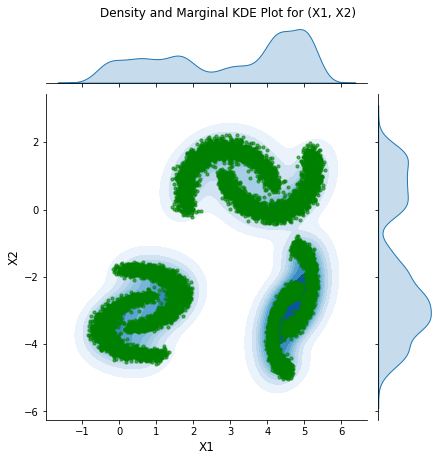

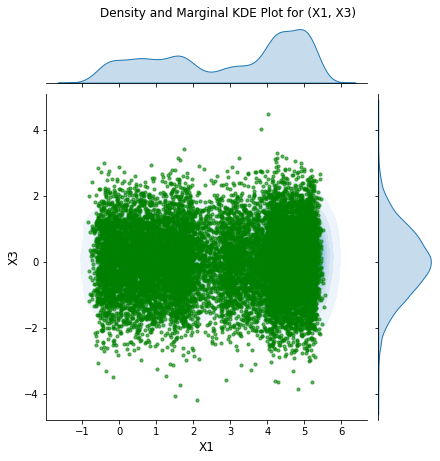

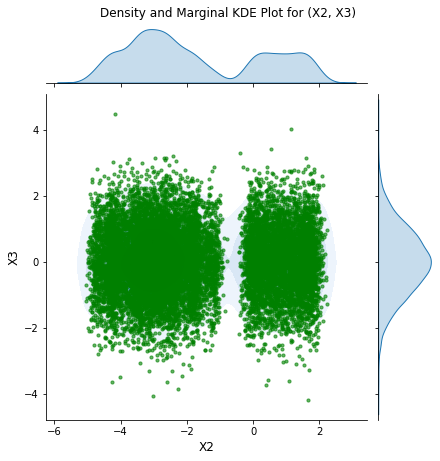

In [4]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt


dimension_pairs = [(0, 1), (0, 2), (1, 2)]

for dim_x, dim_y in dimension_pairs:
    g = sns.jointplot(
        x=X[:, dim_x].cpu().numpy(),
        y=X[:, dim_y].cpu().numpy(),
        kind="kde",
        fill=True,
        cmap="Blues"
    )

    g.plot_joint(plt.scatter, s=10, color='green', alpha=0.6)

    g.set_axis_labels(f'X{dim_x + 1}', f'X{dim_y + 1}', fontsize=12)
    plt.suptitle(f'Density and Marginal KDE Plot for (X{dim_x + 1}, X{dim_y + 1})', y=1.02)

    plt.show()


### Now, your job is to create a diffusion model which will approximate this data distribution.

### 2.1 Time-embedding and  UNet
In this section, you'll work on implementing a simplified UNet architecture with a time-embedding mechanism for processing the input data. The diffusion model uses a custom TimeEmbedding layer and a SmallUNet class to process data.
- **Time Embedding Layer:** Encodes temporal information for each input, enabling the model to consider the temporal context.

- **SmallUNet Architecture:** A simplified version of the UNet model, featuring encoder and decoder layers that transform the input data through downsampling and upsampling pathways.


**Implementing the TimeEmbedding Layer.**
The TimeEmbedding class encodes the time step (t) as a sinusoidal embedding, providing meaningful time representations. We implemented the TimeEmbedding for you.
- **Attributes:**
  - dim: Dimensionality of the time embedding vector.
- **Steps to Implement the Forward Pass:**
     - **Half Dim Calculation:** Divide dim by 2 to obtain the number of sinusoidal terms.
     - **Embedding Vector Creation:** Generate sinusoidal terms using exponential scaling on the range (0, half_dim).
     - **Combine Sin and Cos Terms:** Calculate sin and cos values for each term and concatenate them to form the embedding vector.


**Implementing the SmallUNet Architecture.**
The SmallUNet is designed to perform encoding and decoding on 5-dimensional input data with the following components:
- **Attributes:**
  - **input_dim:** Dimensionality of the input data (set to 5 in this case).
  - **emb_dim:** Dimensionality of the time embedding vector (set to 256 here).
- **Network Layers:**
   - **Encoder Layers (Downsampling):** Sequential linear layers that reduce dimensionality while incorporating time embedding information.
   - **Decoder Layers (Upsampling):** Upsampling layers with skip connections to the encoder layers, reconstructing the data.
   - **Normalization Layers:** Layer normalization applied to improve convergence and stability.
   - **Non-Linearity:** We use SILU non-linearity function as the end of encoder and decoder layers.

Here is overall the flow diagram of the forward pass through the network. Note $X$ is the input.
![Architecture](https://piazza.com/class_profile/get_resource/m0iur8tq7of4mw/m2soer7cjly13q)

### Question: Implementing Encoder Layers for `SmallUNet` (total: 30 points)

In this exercise, you’ll build the `SmallUNet` model by creating three linear layers. These layers transform the input data, including time embedding, to prepare it for decoding. Complete the instructions below to define the encoder layers.

---

#### 2.1.1: Define the Encoder Layers in `SmallUNet` (5 points)  

1. **Define `self.enc1` as a Linear Layer**:
   - The `self.enc1`, should take the concatenated input data and time embedding as input. Define the `linear layer` in `Encoder Layer 1` (see architecture) with the following dimensions.
   - **Input Dimension**: `input_dim + emb_dim` (where `input_dim = 5` and `emb_dim = 256`)
   - **Output Dimension**: `emb_dim`

2. **Define `self.enc2` as a Linear Layer**:
   - The `self.enc2`, will take the output from `enc1`. Define the `linear layer` in `Encoder Layer 2` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim`
   - **Output Dimension**: `emb_dim`

3. **Define `self.enc3` as a Linear Layer**:
   - The `self.enc3`, will process the output of `enc2`. Define the `linear layer` in `Encoder Layer 3` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim`
   - **Output Dimension**: `emb_dim`
   

#### 2.1.2: Define the Decoder Layers in `SmallUNet` (5 points)

1. **Define `self.dec1` as a Linear Layer**:
   - The `self.dec1`, will take the output from the encoding path along with a skip connection. Define the `linear layer` in `Decoder Layer 1` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim + emb_dim`
   - **Output Dimension**: `emb_dim`

2. **Define `self.dec2` as a Linear Layer**:
   - The `self.ec2`, will take the output from `dec1` along with another skip connection. Define the `linear layer` in `Decoder Layer 2` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim + emb_dim`
   - **Output Dimension**: `emb_dim`

3. **Define `self.out_layer` as the Final Output Layer**:
   - The final layer, `self.out_layer`, reduces the dimensionality to the original input dimension. Define the `linear layer` in `Output Layer` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim`
   - **Output Dimension**: `input_dim` (5-dimensional)


#### 2.1.3: Define the Normalization Layers in `SmallUNet` (5 points)

1. **Define `self.norm1` as a LayerNorm Layer**:
   - This layer normalizes the output of the first encoder layer. This is the `LayerNorm` in `Encoder Layer 1`(see architecture).
   - **Input Dimension**: `emb_dim`

2. **Define `self.norm2` as a LayerNorm Layer**:
   - This layer normalizes the output of the second encoder layer. This is the `LayerNorm` in `Encoder Layer 2`(see architecture).
   - **Input Dimension**: `emb_dim`

3. **Define `self.norm3` as a LayerNorm Layer**:
   - This layer normalizes the output of the third encoder layer. This is the `LayerNorm` in `Encoder Layer 3`(see architecture).
   - **Input Dimension**: `emb_dim`


#### 2.1.4: Define the Forward Pass in `SmallUNet` (15 points)

1. **Encoding Path with Layer Normalization (see architecture)**:
   - **Define `self.enc1` as a Linear Layer**:
      - The first encoder layer should take the concatenated input data and time embedding as input.
      - **Input Dimension**: `input_dim + emb_dim` (where `input_dim = 5` and `emb_dim = 256`)
      - **Output Dimension**: `emb_dim`

   - **Define `self.enc2` as a Linear Layer**:
      - The second encoder layer further refines the features produced by `enc1`.
      - **Input and Output Dimension**: `emb_dim`
   
   - **Define `self.enc3` as a Linear Layer**:
      - The third encoder layer applies an additional transformation for further feature refinement.
      - **Input and Output Dimension**: `emb_dim`

2. **Decoding Path** (see architecture):
    - **Define `d1` with Skip Connections**:
        - Concatenate the output from the last encoder layer (`h3`) with the output from the previous encoder layer (`h2`).
        - Pass this concatenated tensor through the first decoder layer `self.dec1` with **SiLU activation**.
  
    - **Define `d2` with Skip Connections**:
       - Concatenate the output from `d1` with the output from the first encoder layer (`h1`).
       - Pass this concatenated tensor through the second decoder layer `self.dec2` with **SiLU activation**.
   

In [5]:
class TimeEmbedding(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, t):
        half_dim = self.dim // 2
        emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -(math.log(10000) / half_dim)).to(t.device)
        emb = t[:, None] * emb[None, :]
        return torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)

class SmallUNet(nn.Module):
    def __init__(self, input_dim=5, emb_dim=256):
        super(SmallUNet, self).__init__()

        self.input_dim = input_dim
        self.emb_dim = emb_dim

        # Time embedding
        self.time_embedding = TimeEmbedding(emb_dim)

        ############################################
        ################ YOUR CODE HERE ############
        ############################################
        # Encoder (Downsampling)
        self.enc1 = nn.Linear(input_dim + emb_dim, emb_dim)
        self.enc2 = nn.Linear(emb_dim, emb_dim)
        self.enc3 = nn.Linear(emb_dim, emb_dim)

        # Decoder (Upsampling)
        self.dec1 = nn.Linear(emb_dim * 2, emb_dim)
        self.dec2 = nn.Linear(emb_dim * 2, emb_dim)
        self.out_layer = nn.Linear(emb_dim, input_dim)

        # Normalization layers
        self.norm1 = nn.LayerNorm(emb_dim)
        self.norm2 = nn.LayerNorm(emb_dim)
        self.norm3 = nn.LayerNorm(emb_dim)

    def forward(self, x, t):
        # Embed the time
        t_emb = self.time_embedding(t)

        ############################################
        ################ YOUR CODE HERE ############
        ############################################
        # Concatenate time embedding with input data
        x_t =  torch.cat([x, t_emb], dim=1)

        # Encoding (Downsampling path with LayerNorm)
        h1 = F.silu(self.norm1(self.enc1(x_t)))
        h2 = F.silu(self.norm2(self.enc2(h1)))
        h3 = F.silu(self.norm3(self.enc3(h2)))

        # Decoding (Upsampling)
        d1 = F.silu(self.dec1(torch.cat([h3, h2], dim=1)))
        d2 = F.silu(self.dec2(torch.cat([d1, h1], dim=1)))

        # Final output
        out =  self.out_layer(d2)
        return out


## 2.2: Implementing a Diffusion Model Class (total: 15 points)

In this task, you will implement key parts of the `Diffusion` class. This class simulates a diffusion process, where data points become progressively noisier over time steps. You’ll use functions in this class to add noise to an input, as well as sample clean data from the noisy input with the help of a neural network model. Follow the instructions below to complete the required components of the class.

---


### 2.2.1: Adding Noise to Data with `get_noisy_image`: (7.5 points)
   - Implement `get_noisy_image` to add noise to a clean data point `x_0` at a specified time step `t`.
     - **Parameters**:
       - `x_0`: Clean data point tensor (shape: `B x D`).
       - `t`: Timestep tensor (shape: `B x 1`).
     - **Noise Calculation**:
       - Compute `sqrt_alpha_hat` and `sqrt_one_minus_alpha_hat` for the specified timestep `t`.
       - Generate noise `eps` with the same shape as `x_0` using `torch.randn_like`.
       - Return the noisy image at time `t` using the formula:
         $$
x_t = \sqrt{\alpha_{\hat{t}}} \times x_0 + \sqrt{1 - \alpha_{\hat{t}}} \times \epsilon
$$

### 2.2.2:  Sampling Clean Data from Noise with `sample`: (7.5 points)
   - Implement `sample` to progressively denoise a noisy image and retrieve clean samples.
     - **Parameters**:
       - `model`: Model that predicts noise at each timestep.
       - `n`: Number of samples.
       - `dim`: Dimensionality of the samples.
     - **Sampling Loop**:
       - Initialize a random noise tensor `x` of shape `(n, dim)`.
       - Loop through each timestep in reverse, denoising at each step:
         - Use the model to predict noise.
         - Update `x` using the denoising formula, incorporating terms for `alpha`, `alpha_hat`, `beta`, and any additional noise if `i > 1`.
     - Return the final denoised samples.

---

In [6]:
import torch

class Diffusion:
    def __init__(self, num_timesteps=1000, beta_start=1e-4, beta_end=0.02, img_size=64, device="cuda"):
        self.num_timesteps = num_timesteps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.img_size = img_size
        self.device = device

        # Linear beta schedule from beta_start to beta_end
        self.beta = torch.linspace(self.beta_start, self.beta_end, self.num_timesteps).to(self.device)
        self.alpha = 1. - self.beta
        self.alpha_hat = torch.cumprod(self.alpha, dim=0)

    def get_noisy_image(self, x_0, t):
        '''
        forward pass of diffusion
        x_0: Clean data point (B x D)
        t: Timestep (B x 1)
        Returns: Noisy image (x_t) at timestep t
        '''

        ############################################
        ################ YOUR CODE HERE ############
        ############################################
        sqrt_alpha_hat = torch.sqrt(self.alpha_hat[t]).view(-1, 1).to(self.device)
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alpha_hat[t]).view(-1, 1).to(self.device)
        eps = torch.randn_like(x_0).to(self.device) 
        
        return sqrt_alpha_hat * x_0 + sqrt_one_minus_alpha_hat * eps, eps


    def sample(self, model, n, dim, device='cuda'):
        '''
        backward pass of diffusion
        n: Number of samples
        dim: Dimensionality of the samples
        '''
        model.eval()
        with torch.no_grad():
            x = torch.randn((n, dim)).to(self.device)  # Start from random noise
            ############################################
            ################ YOUR CODE HERE ############
            ############################################
            for i in reversed(range(1, self.num_timesteps)):
                t = torch.ones(n, dtype=torch.long, device=self.device) * i
                predicted_noise = model(x, t)
                
                alpha = self.alpha[i]
                alpha_hat = self.alpha_hat[i]
                beta = self.beta[i]
                
                if i > 1:
                    noise = torch.randn_like(x)
                else:
                    noise = torch.zeros_like(x)

                x = (1 / torch.sqrt(alpha)) * (x - ((1 - alpha) / torch.sqrt(1 - alpha_hat)) * predicted_noise) + \
                    torch.sqrt(beta) * noise 
        return x


## Question: Implementing the Training Loop for a Diffusion Model (total: 15 points)

In this task, you’ll implement the training loop for a diffusion model, using a neural network to predict noise added to data at various timesteps. This will help the model learn to denoise data over time. Follow the steps below to set up and execute the training process.

---

### 2.3.1: Set Up the Model and Training Configuration: (1 points)
   - **Device Selection**: Define `device` as `'cuda'` (if a GPU is available) or `'cpu'`.
   - **Model and Optimizer**:
     - Initialize the `SmallUNet` model with an `input_dim` of 5 (for 5D data) and move it to the selected device.
     - Define the optimizer using `Adam` with a learning rate of `1e-4`.
     - Use mean squared error (MSE) as the loss function.

### 2.3.2: Initialize the Diffusion Process: (2 points)
   - Create an instance of the `Diffusion` class with `num_timesteps=1000` and move it to the selected device.

### 2.3.3: Define Training Loop Configuration: (2 points)
   - Set `n_epochs` to 500 and `batch_size` to 64.
   - Calculate the number of samples (`n_samples`) from `X.shape[0]`.
   - Create an empty list `epoch_losses` to store the average loss at the end of each epoch.

### 2.3.4: Implement the Training Loop: (10 points)
   - **Batch Loop**:
     - For each batch:
       - Use `get_noisy_image` to obtain the noisy image and the noise added.
       - Pass the noisy image and timestep `t` to the model to predict the noise.
       - Calculate the MSE loss between the predicted noise and actual noise.
     - **Backpropagation and Optimization**:
       - Perform backpropagation with `loss.backward()`.
       - Apply gradient clipping with `torch.nn.utils.clip_grad_norm_` to avoid exploding gradients.
       - Update model parameters with `optimizer.step()`.
   - Calculate and store the average loss for each epoch in `epoch_losses`, then print it.


In [7]:
# Setup for training
############################################
################ YOUR CODE HERE ############
############################################
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SmallUNet(input_dim=5, emb_dim=256).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

# Initialize the diffusion process
diffusion = Diffusion(num_timesteps=1000, beta_start=1e-4, beta_end=0.02, img_size=64, device=device)

# Training loop
n_epochs = 500
batch_size = 64
n_samples = X.shape[0]

# List to store the loss at the end of each epoch
epoch_losses = []

for epoch in range(n_epochs):
    epoch_loss = 0
    print(f'Epoch {epoch + 1}/{n_epochs}')
    for i in tqdm(range(0, n_samples, batch_size)):
        # Get batch
        batch = X[i:i+batch_size].to(device)

        # Sample random timesteps
        t = torch.randint(1, diffusion.num_timesteps, (batch.size(0),)).to(device)

        ############################################
        ################ YOUR CODE HERE ############
        ############################################
        optimizer.zero_grad()
        noisy_batch,eps = diffusion.get_noisy_image(batch, t)
        predicted_noise = model(noisy_batch, t)
        loss = criterion(predicted_noise, eps)
        loss.backward()

        # Gradient clipping to avoid NaNs
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        epoch_loss += loss.item()
        optimizer.step()

    # Calculate average loss for the epoch and store it
    epoch_loss /= (n_samples // batch_size)
    epoch_losses.append(epoch_loss)

    print(f'Epoch {epoch + 1} Loss: {epoch_loss}')




 14%|█▍        | 34/235 [00:00<00:00, 332.78it/s]

Epoch 1/500


 15%|█▌        | 36/235 [00:00<00:00, 355.11it/s]

Epoch 1 Loss: 0.525586816490206
Epoch 2/500


 15%|█▌        | 36/235 [00:00<00:00, 358.64it/s]

Epoch 2 Loss: 0.3226810542182026
Epoch 3/500


 15%|█▌        | 36/235 [00:00<00:00, 358.84it/s]

Epoch 3 Loss: 0.31197160444198513
Epoch 4/500


 16%|█▌        | 37/235 [00:00<00:00, 361.62it/s]

Epoch 4 Loss: 0.3134666548198105
Epoch 5/500


 16%|█▌        | 37/235 [00:00<00:00, 361.24it/s]

Epoch 5 Loss: 0.3056339121654502
Epoch 6/500


 16%|█▌        | 37/235 [00:00<00:00, 362.70it/s]

Epoch 6 Loss: 0.31665231586776227
Epoch 7/500


 16%|█▌        | 37/235 [00:00<00:00, 362.80it/s]

Epoch 7 Loss: 0.31547611951828003
Epoch 8/500


 16%|█▌        | 37/235 [00:00<00:00, 363.29it/s]

Epoch 8 Loss: 0.309570260409616
Epoch 9/500


 16%|█▌        | 37/235 [00:00<00:00, 364.18it/s]

Epoch 9 Loss: 0.3090584340513262
Epoch 10/500


 16%|█▌        | 37/235 [00:00<00:00, 363.51it/s]

Epoch 10 Loss: 0.3188159483620244
Epoch 11/500


 16%|█▌        | 37/235 [00:00<00:00, 365.68it/s]

Epoch 11 Loss: 0.3128090596351868
Epoch 12/500


 16%|█▌        | 37/235 [00:00<00:00, 366.71it/s]

Epoch 12 Loss: 0.3104597595639718
Epoch 13/500


 16%|█▌        | 37/235 [00:00<00:00, 365.80it/s]

Epoch 13 Loss: 0.3162198744905301
Epoch 14/500


 16%|█▌        | 37/235 [00:00<00:00, 366.24it/s]

Epoch 14 Loss: 0.31314500911622983
Epoch 15/500


 16%|█▌        | 37/235 [00:00<00:00, 367.08it/s]

Epoch 15 Loss: 0.30897492144861793
Epoch 16/500


 16%|█▌        | 37/235 [00:00<00:00, 367.10it/s]

Epoch 16 Loss: 0.31214396993064475
Epoch 17/500


 16%|█▌        | 37/235 [00:00<00:00, 367.36it/s]

Epoch 17 Loss: 0.31252123198957527
Epoch 18/500


 16%|█▌        | 37/235 [00:00<00:00, 366.69it/s]

Epoch 18 Loss: 0.3070979962109501
Epoch 19/500


 16%|█▌        | 37/235 [00:00<00:00, 367.67it/s]

Epoch 19 Loss: 0.32055519241043645
Epoch 20/500


 16%|█▌        | 37/235 [00:00<00:00, 366.94it/s]

Epoch 20 Loss: 0.31158739258336204
Epoch 21/500


 16%|█▌        | 37/235 [00:00<00:00, 366.37it/s]

Epoch 21 Loss: 0.30897863903361505
Epoch 22/500


 16%|█▌        | 37/235 [00:00<00:00, 367.49it/s]

Epoch 22 Loss: 0.3158671261790471
Epoch 23/500


 16%|█▌        | 37/235 [00:00<00:00, 368.07it/s]

Epoch 23 Loss: 0.3083323228180918
Epoch 24/500


 16%|█▌        | 37/235 [00:00<00:00, 368.47it/s]

Epoch 24 Loss: 0.3172262182347795
Epoch 25/500


 16%|█▌        | 37/235 [00:00<00:00, 368.14it/s]

Epoch 25 Loss: 0.3134377589210486
Epoch 26/500


 16%|█▌        | 37/235 [00:00<00:00, 367.99it/s]

Epoch 26 Loss: 0.3115488580531544
Epoch 27/500


 16%|█▌        | 37/235 [00:00<00:00, 367.85it/s]

Epoch 27 Loss: 0.31244319944809645
Epoch 28/500


 16%|█▌        | 37/235 [00:00<00:00, 368.64it/s]

Epoch 28 Loss: 0.31034289790779096
Epoch 29/500


 16%|█▌        | 37/235 [00:00<00:00, 367.54it/s]

Epoch 29 Loss: 0.31368119053096855
Epoch 30/500


 16%|█▌        | 37/235 [00:00<00:00, 368.80it/s]

Epoch 30 Loss: 0.31335679155129653
Epoch 31/500


 16%|█▌        | 37/235 [00:00<00:00, 367.26it/s]

Epoch 31 Loss: 0.3124026111685313
Epoch 32/500


 16%|█▌        | 37/235 [00:00<00:00, 368.33it/s]

Epoch 32 Loss: 0.31403499631545484
Epoch 33/500


 16%|█▌        | 37/235 [00:00<00:00, 368.51it/s]

Epoch 33 Loss: 0.3114453983357829
Epoch 34/500


 16%|█▌        | 37/235 [00:00<00:00, 368.27it/s]

Epoch 34 Loss: 0.30891409554542637
Epoch 35/500


 16%|█▌        | 37/235 [00:00<00:00, 367.86it/s]

Epoch 35 Loss: 0.3067627121240665
Epoch 36/500


 16%|█▌        | 37/235 [00:00<00:00, 368.79it/s]

Epoch 36 Loss: 0.3122327257043276
Epoch 37/500


 16%|█▌        | 37/235 [00:00<00:00, 368.73it/s]

Epoch 37 Loss: 0.312193400075293
Epoch 38/500


 16%|█▌        | 37/235 [00:00<00:00, 369.01it/s]

Epoch 38 Loss: 0.31684451658501583
Epoch 39/500


 16%|█▌        | 37/235 [00:00<00:00, 368.95it/s]

Epoch 39 Loss: 0.3096157799546535
Epoch 40/500


 16%|█▌        | 37/235 [00:00<00:00, 368.76it/s]

Epoch 40 Loss: 0.3187438573720109
Epoch 41/500


 16%|█▌        | 37/235 [00:00<00:00, 368.67it/s]

Epoch 41 Loss: 0.3105702821770285
Epoch 42/500


 16%|█▌        | 37/235 [00:00<00:00, 368.22it/s]

Epoch 42 Loss: 0.3140099391850651
Epoch 43/500


 16%|█▌        | 37/235 [00:00<00:00, 368.28it/s]

Epoch 43 Loss: 0.3119396844990233
Epoch 44/500


 16%|█▌        | 37/235 [00:00<00:00, 369.01it/s]

Epoch 44 Loss: 0.30977214936517244
Epoch 45/500


 16%|█▌        | 37/235 [00:00<00:00, 368.53it/s]

Epoch 45 Loss: 0.31140507305534476
Epoch 46/500


 16%|█▌        | 37/235 [00:00<00:00, 369.02it/s]

Epoch 46 Loss: 0.31415526123128384
Epoch 47/500


 16%|█▌        | 37/235 [00:00<00:00, 368.48it/s]

Epoch 47 Loss: 0.31581490092043185
Epoch 48/500


 16%|█▌        | 37/235 [00:00<00:00, 367.57it/s]

Epoch 48 Loss: 0.30598674243331975
Epoch 49/500


 16%|█▌        | 37/235 [00:00<00:00, 368.99it/s]

Epoch 49 Loss: 0.3114387499980437
Epoch 50/500


 16%|█▌        | 37/235 [00:00<00:00, 368.28it/s]

Epoch 50 Loss: 0.3111174469256503
Epoch 51/500


 16%|█▌        | 37/235 [00:00<00:00, 368.72it/s]

Epoch 51 Loss: 0.31148067842691374
Epoch 52/500


 16%|█▌        | 37/235 [00:00<00:00, 368.89it/s]

Epoch 52 Loss: 0.3074228450273856
Epoch 53/500


 16%|█▌        | 37/235 [00:00<00:00, 368.75it/s]

Epoch 53 Loss: 0.3063506966727412
Epoch 54/500


 16%|█▌        | 37/235 [00:00<00:00, 369.22it/s]

Epoch 54 Loss: 0.30997877240053606
Epoch 55/500


 16%|█▌        | 37/235 [00:00<00:00, 367.26it/s]

Epoch 55 Loss: 0.31389842220605946
Epoch 56/500


 16%|█▌        | 37/235 [00:00<00:00, 369.59it/s]

Epoch 56 Loss: 0.31316265973270446
Epoch 57/500


 16%|█▌        | 37/235 [00:00<00:00, 369.64it/s]

Epoch 57 Loss: 0.3055350442345326
Epoch 58/500


 16%|█▌        | 37/235 [00:00<00:00, 368.72it/s]

Epoch 58 Loss: 0.3084596546414571
Epoch 59/500


 16%|█▌        | 37/235 [00:00<00:00, 368.99it/s]

Epoch 59 Loss: 0.3110006388563376
Epoch 60/500


 16%|█▌        | 37/235 [00:00<00:00, 368.57it/s]

Epoch 60 Loss: 0.3058925512382108
Epoch 61/500


 16%|█▌        | 37/235 [00:00<00:00, 368.80it/s]

Epoch 61 Loss: 0.310094075388888
Epoch 62/500


 16%|█▌        | 37/235 [00:00<00:00, 369.53it/s]

Epoch 62 Loss: 0.30510138733010006
Epoch 63/500


 16%|█▌        | 37/235 [00:00<00:00, 368.91it/s]

Epoch 63 Loss: 0.31199016785010314
Epoch 64/500


 16%|█▌        | 37/235 [00:00<00:00, 369.96it/s]

Epoch 64 Loss: 0.30531108067331153
Epoch 65/500


 16%|█▌        | 37/235 [00:00<00:00, 368.80it/s]

Epoch 65 Loss: 0.31170259556199753
Epoch 66/500


 16%|█▌        | 37/235 [00:00<00:00, 369.03it/s]

Epoch 66 Loss: 0.3087657885546358
Epoch 67/500


 16%|█▌        | 37/235 [00:00<00:00, 369.90it/s]

Epoch 67 Loss: 0.3134257670842175
Epoch 68/500


 16%|█▌        | 37/235 [00:00<00:00, 368.79it/s]

Epoch 68 Loss: 0.3050652538609301
Epoch 69/500


 16%|█▌        | 37/235 [00:00<00:00, 369.52it/s]

Epoch 69 Loss: 0.30506841176086
Epoch 70/500


 16%|█▌        | 37/235 [00:00<00:00, 369.14it/s]

Epoch 70 Loss: 0.30243600293611866
Epoch 71/500


 16%|█▌        | 37/235 [00:00<00:00, 369.91it/s]

Epoch 71 Loss: 0.3083241516326228
Epoch 72/500


 16%|█▌        | 37/235 [00:00<00:00, 369.30it/s]

Epoch 72 Loss: 0.30959274677129894
Epoch 73/500


 16%|█▌        | 38/235 [00:00<00:00, 370.17it/s]

Epoch 73 Loss: 0.3071780144913584
Epoch 74/500


 16%|█▌        | 38/235 [00:00<00:00, 370.30it/s]

Epoch 74 Loss: 0.3001068163121867
Epoch 75/500


 16%|█▌        | 37/235 [00:00<00:00, 369.29it/s]

Epoch 75 Loss: 0.30808141369086045
Epoch 76/500


 16%|█▌        | 37/235 [00:00<00:00, 369.71it/s]

Epoch 76 Loss: 0.31000917131065303
Epoch 77/500


 16%|█▌        | 37/235 [00:00<00:00, 369.52it/s]

Epoch 77 Loss: 0.30104669199412704
Epoch 78/500


 16%|█▌        | 37/235 [00:00<00:00, 368.94it/s]

Epoch 78 Loss: 0.3106766744301869
Epoch 79/500


 16%|█▌        | 38/235 [00:00<00:00, 370.47it/s]

Epoch 79 Loss: 0.29822378580132103
Epoch 80/500


 16%|█▌        | 37/235 [00:00<00:00, 369.49it/s]

Epoch 80 Loss: 0.30217999500087184
Epoch 81/500


 16%|█▌        | 37/235 [00:00<00:00, 368.67it/s]

Epoch 81 Loss: 0.3013749691283601
Epoch 82/500


 16%|█▌        | 37/235 [00:00<00:00, 369.00it/s]

Epoch 82 Loss: 0.309696657407997
Epoch 83/500


 16%|█▌        | 37/235 [00:00<00:00, 369.98it/s]

Epoch 83 Loss: 0.3089929980217901
Epoch 84/500


 16%|█▌        | 37/235 [00:00<00:00, 369.34it/s]

Epoch 84 Loss: 0.307490904807535
Epoch 85/500


 16%|█▌        | 37/235 [00:00<00:00, 368.19it/s]

Epoch 85 Loss: 0.3121182682931933
Epoch 86/500


 16%|█▌        | 37/235 [00:00<00:00, 368.88it/s]

Epoch 86 Loss: 0.3008087467179339
Epoch 87/500


 16%|█▌        | 37/235 [00:00<00:00, 369.33it/s]

Epoch 87 Loss: 0.30497175636581886
Epoch 88/500


 16%|█▌        | 37/235 [00:00<00:00, 368.83it/s]

Epoch 88 Loss: 0.30432698111503553
Epoch 89/500


 16%|█▌        | 37/235 [00:00<00:00, 369.27it/s]

Epoch 89 Loss: 0.3017636691657906
Epoch 90/500


 16%|█▌        | 37/235 [00:00<00:00, 369.38it/s]

Epoch 90 Loss: 0.30054036050270766
Epoch 91/500


 16%|█▌        | 37/235 [00:00<00:00, 369.59it/s]

Epoch 91 Loss: 0.30763840013080174
Epoch 92/500


 16%|█▌        | 37/235 [00:00<00:00, 366.17it/s]

Epoch 92 Loss: 0.29712081280274266
Epoch 93/500


 16%|█▌        | 37/235 [00:00<00:00, 369.85it/s]

Epoch 93 Loss: 0.3058759281013766
Epoch 94/500


 16%|█▌        | 37/235 [00:00<00:00, 369.25it/s]

Epoch 94 Loss: 0.3015105929066483
Epoch 95/500


 16%|█▌        | 37/235 [00:00<00:00, 368.38it/s]

Epoch 95 Loss: 0.30370830005814886
Epoch 96/500


 16%|█▌        | 37/235 [00:00<00:00, 368.68it/s]

Epoch 96 Loss: 0.3038506343578681
Epoch 97/500


 16%|█▌        | 38/235 [00:00<00:00, 370.05it/s]

Epoch 97 Loss: 0.3029614828972735
Epoch 98/500


 16%|█▌        | 37/235 [00:00<00:00, 369.91it/s]

Epoch 98 Loss: 0.29238400149803895
Epoch 99/500


 16%|█▌        | 38/235 [00:00<00:00, 370.59it/s]

Epoch 99 Loss: 0.29810008680463856
Epoch 100/500


 16%|█▌        | 38/235 [00:00<00:00, 370.07it/s]

Epoch 100 Loss: 0.297484532253355
Epoch 101/500


 16%|█▌        | 37/235 [00:00<00:00, 368.50it/s]

Epoch 101 Loss: 0.3000043671355288
Epoch 102/500


 16%|█▌        | 38/235 [00:00<00:00, 370.81it/s]

Epoch 102 Loss: 0.2973121251815405
Epoch 103/500


 16%|█▌        | 38/235 [00:00<00:00, 370.35it/s]

Epoch 103 Loss: 0.3066212745685863
Epoch 104/500


 16%|█▌        | 38/235 [00:00<00:00, 370.03it/s]

Epoch 104 Loss: 0.2981669734685849
Epoch 105/500


 16%|█▌        | 37/235 [00:00<00:00, 368.78it/s]

Epoch 105 Loss: 0.3089395275291724
Epoch 106/500


 16%|█▌        | 37/235 [00:00<00:00, 369.90it/s]

Epoch 106 Loss: 0.3069223351458199
Epoch 107/500


 16%|█▌        | 37/235 [00:00<00:00, 369.65it/s]

Epoch 107 Loss: 0.29383116794957054
Epoch 108/500


 16%|█▌        | 38/235 [00:00<00:00, 370.24it/s]

Epoch 108 Loss: 0.29487869697503555
Epoch 109/500


 16%|█▌        | 37/235 [00:00<00:00, 369.51it/s]

Epoch 109 Loss: 0.3050832957284063
Epoch 110/500


 16%|█▌        | 37/235 [00:00<00:00, 369.74it/s]

Epoch 110 Loss: 0.30267859829796684
Epoch 111/500


 16%|█▌        | 37/235 [00:00<00:00, 369.82it/s]

Epoch 111 Loss: 0.3010991663377509
Epoch 112/500


 16%|█▌        | 37/235 [00:00<00:00, 369.54it/s]

Epoch 112 Loss: 0.3002587613514346
Epoch 113/500


 16%|█▌        | 38/235 [00:00<00:00, 371.20it/s]

Epoch 113 Loss: 0.2939799219115168
Epoch 114/500


 16%|█▌        | 38/235 [00:00<00:00, 371.24it/s]

Epoch 114 Loss: 0.2986794651891941
Epoch 115/500


 16%|█▌        | 37/235 [00:00<00:00, 369.39it/s]

Epoch 115 Loss: 0.294581806127969
Epoch 116/500


 16%|█▌        | 37/235 [00:00<00:00, 369.74it/s]

Epoch 116 Loss: 0.30378915566919196
Epoch 117/500


 16%|█▌        | 37/235 [00:00<00:00, 369.83it/s]

Epoch 117 Loss: 0.29607542088398564
Epoch 118/500


 16%|█▌        | 37/235 [00:00<00:00, 368.97it/s]

Epoch 118 Loss: 0.2965208093325297
Epoch 119/500


 16%|█▌        | 38/235 [00:00<00:00, 370.29it/s]

Epoch 119 Loss: 0.30034329385584235
Epoch 120/500


 16%|█▌        | 37/235 [00:00<00:00, 369.15it/s]

Epoch 120 Loss: 0.297747139683646
Epoch 121/500


 16%|█▌        | 37/235 [00:00<00:00, 369.51it/s]

Epoch 121 Loss: 0.3016644531590307
Epoch 122/500


 16%|█▌        | 38/235 [00:00<00:00, 370.34it/s]

Epoch 122 Loss: 0.2973741256018989
Epoch 123/500


 16%|█▌        | 37/235 [00:00<00:00, 369.45it/s]

Epoch 123 Loss: 0.295615817555505
Epoch 124/500


 16%|█▌        | 37/235 [00:00<00:00, 368.86it/s]

Epoch 124 Loss: 0.29194863127847004
Epoch 125/500


 16%|█▌        | 37/235 [00:00<00:00, 368.96it/s]

Epoch 125 Loss: 0.301474477427128
Epoch 126/500


 16%|█▌        | 38/235 [00:00<00:00, 370.04it/s]

Epoch 126 Loss: 0.2923641502857208
Epoch 127/500


 16%|█▌        | 37/235 [00:00<00:00, 369.97it/s]

Epoch 127 Loss: 0.30233014884412795
Epoch 128/500


 16%|█▌        | 37/235 [00:00<00:00, 369.75it/s]

Epoch 128 Loss: 0.3022398441138431
Epoch 129/500


 16%|█▌        | 38/235 [00:00<00:00, 370.29it/s]

Epoch 129 Loss: 0.29440337585078347
Epoch 130/500


 16%|█▌        | 38/235 [00:00<00:00, 370.28it/s]

Epoch 130 Loss: 0.29653282342558235
Epoch 131/500


 16%|█▌        | 38/235 [00:00<00:00, 370.66it/s]

Epoch 131 Loss: 0.29251600821048784
Epoch 132/500


 16%|█▌        | 37/235 [00:00<00:00, 369.66it/s]

Epoch 132 Loss: 0.29622060684566826
Epoch 133/500


 16%|█▌        | 38/235 [00:00<00:00, 370.48it/s]

Epoch 133 Loss: 0.298863575881363
Epoch 134/500


 16%|█▌        | 38/235 [00:00<00:00, 370.51it/s]

Epoch 134 Loss: 0.3037998142660174
Epoch 135/500


 16%|█▌        | 38/235 [00:00<00:00, 370.11it/s]

Epoch 135 Loss: 0.29860147821088123
Epoch 136/500


 16%|█▌        | 37/235 [00:00<00:00, 369.60it/s]

Epoch 136 Loss: 0.29949171299863064
Epoch 137/500


 16%|█▌        | 38/235 [00:00<00:00, 370.82it/s]

Epoch 137 Loss: 0.29037415070666206
Epoch 138/500


 16%|█▌        | 37/235 [00:00<00:00, 369.09it/s]

Epoch 138 Loss: 0.2941888383884206
Epoch 139/500


 16%|█▌        | 38/235 [00:00<00:00, 370.25it/s]

Epoch 139 Loss: 0.2940636013562863
Epoch 140/500


 16%|█▌        | 38/235 [00:00<00:00, 370.53it/s]

Epoch 140 Loss: 0.29648698337821877
Epoch 141/500


 16%|█▌        | 38/235 [00:00<00:00, 371.08it/s]

Epoch 141 Loss: 0.2910511866211891
Epoch 142/500


 16%|█▌        | 38/235 [00:00<00:00, 370.89it/s]

Epoch 142 Loss: 0.29169974743555754
Epoch 143/500


 16%|█▌        | 38/235 [00:00<00:00, 370.81it/s]

Epoch 143 Loss: 0.2945134563960581
Epoch 144/500


 16%|█▌        | 38/235 [00:00<00:00, 370.74it/s]

Epoch 144 Loss: 0.29436385828969824
Epoch 145/500


 16%|█▌        | 37/235 [00:00<00:00, 368.95it/s]

Epoch 145 Loss: 0.29612057853458273
Epoch 146/500


 16%|█▌        | 37/235 [00:00<00:00, 369.64it/s]

Epoch 146 Loss: 0.30138991333735293
Epoch 147/500


 16%|█▌        | 37/235 [00:00<00:00, 365.29it/s]

Epoch 147 Loss: 0.301761353499869
Epoch 148/500


 16%|█▌        | 37/235 [00:00<00:00, 366.14it/s]

Epoch 148 Loss: 0.2925373234300532
Epoch 149/500


 16%|█▌        | 37/235 [00:00<00:00, 368.23it/s]

Epoch 149 Loss: 0.29763241042184013
Epoch 150/500


 16%|█▌        | 37/235 [00:00<00:00, 368.40it/s]

Epoch 150 Loss: 0.29359546224148864
Epoch 151/500


 16%|█▌        | 37/235 [00:00<00:00, 369.16it/s]

Epoch 151 Loss: 0.2984070756241807
Epoch 152/500


 16%|█▌        | 37/235 [00:00<00:00, 369.33it/s]

Epoch 152 Loss: 0.2980668335261508
Epoch 153/500


 16%|█▌        | 37/235 [00:00<00:00, 368.78it/s]

Epoch 153 Loss: 0.2899238788801381
Epoch 154/500


 16%|█▌        | 37/235 [00:00<00:00, 369.09it/s]

Epoch 154 Loss: 0.2930596977090224
Epoch 155/500


 16%|█▌        | 37/235 [00:00<00:00, 368.37it/s]

Epoch 155 Loss: 0.2888435545640114
Epoch 156/500


 16%|█▌        | 37/235 [00:00<00:00, 369.26it/s]

Epoch 156 Loss: 0.29839398654607624
Epoch 157/500


 16%|█▌        | 37/235 [00:00<00:00, 368.50it/s]

Epoch 157 Loss: 0.2884643091859981
Epoch 158/500


 16%|█▌        | 37/235 [00:00<00:00, 369.17it/s]

Epoch 158 Loss: 0.2942975062208298
Epoch 159/500


 16%|█▌        | 37/235 [00:00<00:00, 369.51it/s]

Epoch 159 Loss: 0.28850151907302374
Epoch 160/500


 31%|███▏      | 74/235 [00:00<00:00, 369.69it/s]

Epoch 160 Loss: 0.29396724032285887
Epoch 161/500


 16%|█▌        | 37/235 [00:00<00:00, 369.27it/s]

Epoch 161 Loss: 0.29536010452315337
Epoch 162/500


 16%|█▌        | 37/235 [00:00<00:00, 368.82it/s]

Epoch 162 Loss: 0.2905242557072232
Epoch 163/500


 16%|█▌        | 37/235 [00:00<00:00, 369.82it/s]

Epoch 163 Loss: 0.2901868950097989
Epoch 164/500


 16%|█▌        | 37/235 [00:00<00:00, 369.29it/s]

Epoch 164 Loss: 0.29465943638585573
Epoch 165/500


 16%|█▌        | 38/235 [00:00<00:00, 370.79it/s]

Epoch 165 Loss: 0.30246907886531615
Epoch 166/500


 16%|█▌        | 37/235 [00:00<00:00, 368.11it/s]

Epoch 166 Loss: 0.29148511378428876
Epoch 167/500


 16%|█▌        | 38/235 [00:00<00:00, 370.95it/s]

Epoch 167 Loss: 0.30041268576159436
Epoch 168/500


 16%|█▌        | 37/235 [00:00<00:00, 367.49it/s]

Epoch 168 Loss: 0.29049243453221446
Epoch 169/500


 16%|█▌        | 37/235 [00:00<00:00, 369.67it/s]

Epoch 169 Loss: 0.29266685432093775
Epoch 170/500


 16%|█▌        | 38/235 [00:00<00:00, 371.34it/s]

Epoch 170 Loss: 0.2998333968158461
Epoch 171/500


 16%|█▌        | 37/235 [00:00<00:00, 369.44it/s]

Epoch 171 Loss: 0.28741396358634674
Epoch 172/500


 16%|█▌        | 38/235 [00:00<00:00, 370.61it/s]

Epoch 172 Loss: 0.2937854627768199
Epoch 173/500


 16%|█▌        | 37/235 [00:00<00:00, 369.66it/s]

Epoch 173 Loss: 0.29524824449903947
Epoch 174/500


 31%|███▏      | 74/235 [00:00<00:00, 368.69it/s]

Epoch 174 Loss: 0.294754074806841
Epoch 175/500


 16%|█▌        | 37/235 [00:00<00:00, 369.08it/s]

Epoch 175 Loss: 0.2982796833683283
Epoch 176/500


 31%|███▏      | 74/235 [00:00<00:00, 368.47it/s]

Epoch 176 Loss: 0.2952413893280885
Epoch 177/500


 16%|█▌        | 37/235 [00:00<00:00, 368.18it/s]

Epoch 177 Loss: 0.2889379255919375
Epoch 178/500


 16%|█▌        | 37/235 [00:00<00:00, 369.32it/s]

Epoch 178 Loss: 0.29113838401360387
Epoch 179/500


 16%|█▌        | 37/235 [00:00<00:00, 369.65it/s]

Epoch 179 Loss: 0.2939135099832828
Epoch 180/500


 16%|█▌        | 37/235 [00:00<00:00, 369.51it/s]

Epoch 180 Loss: 0.2967703181326899
Epoch 181/500


 16%|█▌        | 37/235 [00:00<00:00, 368.62it/s]

Epoch 181 Loss: 0.2967274407418365
Epoch 182/500


 31%|███▏      | 74/235 [00:00<00:00, 369.35it/s]

Epoch 182 Loss: 0.2930826442873376
Epoch 183/500


 16%|█▌        | 38/235 [00:00<00:00, 370.20it/s]

Epoch 183 Loss: 0.2890656189276622
Epoch 184/500


 16%|█▌        | 37/235 [00:00<00:00, 368.87it/s]

Epoch 184 Loss: 0.29744479614190567
Epoch 185/500


 31%|███▏      | 74/235 [00:00<00:00, 369.50it/s]

Epoch 185 Loss: 0.2949890704172799
Epoch 186/500


 16%|█▌        | 38/235 [00:00<00:00, 370.05it/s]

Epoch 186 Loss: 0.293629195381943
Epoch 187/500


 16%|█▌        | 37/235 [00:00<00:00, 369.59it/s]

Epoch 187 Loss: 0.2895443618424937
Epoch 188/500


 31%|███▏      | 74/235 [00:00<00:00, 369.60it/s]

Epoch 188 Loss: 0.29048278590298104
Epoch 189/500


 16%|█▌        | 37/235 [00:00<00:00, 369.31it/s]

Epoch 189 Loss: 0.29295987495754516
Epoch 190/500


 16%|█▌        | 37/235 [00:00<00:00, 369.54it/s]

Epoch 190 Loss: 0.291473404591919
Epoch 191/500


 16%|█▌        | 38/235 [00:00<00:00, 370.16it/s]

Epoch 191 Loss: 0.2951810755408727
Epoch 192/500


 31%|███▏      | 74/235 [00:00<00:00, 369.43it/s]

Epoch 192 Loss: 0.28971571959236747
Epoch 193/500


 16%|█▌        | 37/235 [00:00<00:00, 369.60it/s]

Epoch 193 Loss: 0.2960919019503471
Epoch 194/500


 16%|█▌        | 37/235 [00:00<00:00, 369.55it/s]

Epoch 194 Loss: 0.29340120449534846
Epoch 195/500


 16%|█▌        | 38/235 [00:00<00:00, 370.23it/s]

Epoch 195 Loss: 0.29113281053355616
Epoch 196/500


 16%|█▌        | 37/235 [00:00<00:00, 367.98it/s]

Epoch 196 Loss: 0.2853038235225229
Epoch 197/500


 16%|█▌        | 38/235 [00:00<00:00, 370.30it/s]

Epoch 197 Loss: 0.29446307582478237
Epoch 198/500


 16%|█▌        | 37/235 [00:00<00:00, 369.22it/s]

Epoch 198 Loss: 0.287907789214554
Epoch 199/500


 16%|█▌        | 38/235 [00:00<00:00, 371.20it/s]

Epoch 199 Loss: 0.2936380771108163
Epoch 200/500


 16%|█▌        | 38/235 [00:00<00:00, 370.24it/s]

Epoch 200 Loss: 0.28658450057363916
Epoch 201/500


 16%|█▌        | 37/235 [00:00<00:00, 368.56it/s]

Epoch 201 Loss: 0.2864919773533813
Epoch 202/500


 16%|█▌        | 37/235 [00:00<00:00, 369.76it/s]

Epoch 202 Loss: 0.29418777470660007
Epoch 203/500


 16%|█▌        | 38/235 [00:00<00:00, 370.58it/s]

Epoch 203 Loss: 0.2932868285311593
Epoch 204/500


 16%|█▌        | 37/235 [00:00<00:00, 369.34it/s]

Epoch 204 Loss: 0.29114554956173283
Epoch 205/500


 16%|█▌        | 37/235 [00:00<00:00, 369.46it/s]

Epoch 205 Loss: 0.29303926159428734
Epoch 206/500


 31%|███▏      | 74/235 [00:00<00:00, 369.52it/s]

Epoch 206 Loss: 0.2954227565827533
Epoch 207/500


 16%|█▌        | 37/235 [00:00<00:00, 369.43it/s]

Epoch 207 Loss: 0.29417696970904994
Epoch 208/500


 16%|█▌        | 37/235 [00:00<00:00, 369.33it/s]

Epoch 208 Loss: 0.2868005345519791
Epoch 209/500


 16%|█▌        | 38/235 [00:00<00:00, 370.98it/s]

Epoch 209 Loss: 0.29103607576117557
Epoch 210/500


 16%|█▌        | 38/235 [00:00<00:00, 370.17it/s]

Epoch 210 Loss: 0.28741501309932804
Epoch 211/500


 16%|█▌        | 37/235 [00:00<00:00, 369.51it/s]

Epoch 211 Loss: 0.29596259298487604
Epoch 212/500


 16%|█▌        | 37/235 [00:00<00:00, 367.75it/s]

Epoch 212 Loss: 0.2926148305463995
Epoch 213/500


 31%|███▏      | 74/235 [00:00<00:00, 369.84it/s]

Epoch 213 Loss: 0.29096927009841317
Epoch 214/500


 31%|███▏      | 74/235 [00:00<00:00, 369.42it/s]

Epoch 214 Loss: 0.2958341675818476
Epoch 215/500


 16%|█▌        | 38/235 [00:00<00:00, 370.38it/s]

Epoch 215 Loss: 0.2910725079540514
Epoch 216/500


 16%|█▌        | 37/235 [00:00<00:00, 368.59it/s]

Epoch 216 Loss: 0.2935534911150606
Epoch 217/500


 16%|█▌        | 37/235 [00:00<00:00, 368.58it/s]

Epoch 217 Loss: 0.2991625097954375
Epoch 218/500


 31%|███▏      | 74/235 [00:00<00:00, 369.38it/s]

Epoch 218 Loss: 0.2911757284886817
Epoch 219/500


 16%|█▌        | 37/235 [00:00<00:00, 369.19it/s]

Epoch 219 Loss: 0.2942299949817168
Epoch 220/500


 31%|███▏      | 74/235 [00:00<00:00, 368.68it/s]

Epoch 220 Loss: 0.2900487250751919
Epoch 221/500


 31%|███▏      | 74/235 [00:00<00:00, 369.03it/s]

Epoch 221 Loss: 0.29130143818692267
Epoch 222/500


 16%|█▌        | 37/235 [00:00<00:00, 369.01it/s]

Epoch 222 Loss: 0.29296003957080025
Epoch 223/500


 16%|█▌        | 38/235 [00:00<00:00, 370.61it/s]

Epoch 223 Loss: 0.2923493046536405
Epoch 224/500


 16%|█▌        | 38/235 [00:00<00:00, 371.91it/s]

Epoch 224 Loss: 0.29014333095560724
Epoch 225/500


 16%|█▌        | 38/235 [00:00<00:00, 370.75it/s]

Epoch 225 Loss: 0.2896160362367956
Epoch 226/500


 16%|█▌        | 38/235 [00:00<00:00, 372.00it/s]

Epoch 226 Loss: 0.29174835161648244
Epoch 227/500


 16%|█▌        | 38/235 [00:00<00:00, 370.09it/s]

Epoch 227 Loss: 0.29247687018325186
Epoch 228/500


 16%|█▌        | 38/235 [00:00<00:00, 371.95it/s]

Epoch 228 Loss: 0.2970393154865656
Epoch 229/500


 16%|█▌        | 38/235 [00:00<00:00, 371.38it/s]

Epoch 229 Loss: 0.2895435026695586
Epoch 230/500


 16%|█▌        | 37/235 [00:00<00:00, 369.23it/s]

Epoch 230 Loss: 0.28676873814855885
Epoch 231/500


 16%|█▌        | 38/235 [00:00<00:00, 370.20it/s]

Epoch 231 Loss: 0.29508102073883397
Epoch 232/500


 16%|█▌        | 38/235 [00:00<00:00, 370.24it/s]

Epoch 232 Loss: 0.2910998216551593
Epoch 233/500


 16%|█▌        | 38/235 [00:00<00:00, 370.84it/s]

Epoch 233 Loss: 0.29402435303498536
Epoch 234/500


 16%|█▌        | 38/235 [00:00<00:00, 371.30it/s]

Epoch 234 Loss: 0.29112509064949477
Epoch 235/500


 16%|█▌        | 38/235 [00:00<00:00, 371.33it/s]

Epoch 235 Loss: 0.29796555631945276
Epoch 236/500


 16%|█▌        | 37/235 [00:00<00:00, 369.41it/s]

Epoch 236 Loss: 0.29023985762117255
Epoch 237/500


 16%|█▌        | 38/235 [00:00<00:00, 371.89it/s]

Epoch 237 Loss: 0.2941294374246883
Epoch 238/500


 15%|█▍        | 35/235 [00:00<00:00, 344.63it/s]

Epoch 238 Loss: 0.2877561645502718
Epoch 239/500


 16%|█▌        | 37/235 [00:00<00:00, 369.51it/s]

Epoch 239 Loss: 0.2902441776206351
Epoch 240/500


 16%|█▌        | 38/235 [00:00<00:00, 370.25it/s]

Epoch 240 Loss: 0.29340253802191496
Epoch 241/500


 16%|█▌        | 37/235 [00:00<00:00, 368.97it/s]

Epoch 241 Loss: 0.2985673963259428
Epoch 242/500


 16%|█▌        | 37/235 [00:00<00:00, 369.40it/s]

Epoch 242 Loss: 0.2942196839512923
Epoch 243/500


 16%|█▌        | 37/235 [00:00<00:00, 367.00it/s]

Epoch 243 Loss: 0.29424440523243356
Epoch 244/500


 31%|███▏      | 74/235 [00:00<00:00, 368.62it/s]

Epoch 244 Loss: 0.29388266801834106
Epoch 245/500


 16%|█▌        | 37/235 [00:00<00:00, 369.17it/s]

Epoch 245 Loss: 0.2945155428133459
Epoch 246/500


 31%|███▏      | 74/235 [00:00<00:00, 368.67it/s]

Epoch 246 Loss: 0.2863907708316787
Epoch 247/500


 16%|█▌        | 38/235 [00:00<00:00, 370.34it/s]

Epoch 247 Loss: 0.2867773863622266
Epoch 248/500


 16%|█▌        | 37/235 [00:00<00:00, 367.78it/s]

Epoch 248 Loss: 0.2884737244273862
Epoch 249/500


 31%|███▏      | 74/235 [00:00<00:00, 368.36it/s]

Epoch 249 Loss: 0.2888123547164803
Epoch 250/500


 16%|█▌        | 37/235 [00:00<00:00, 368.66it/s]

Epoch 250 Loss: 0.2954246842453622
Epoch 251/500


 31%|███▏      | 74/235 [00:00<00:00, 369.03it/s]

Epoch 251 Loss: 0.2918162315319746
Epoch 252/500


 31%|███▏      | 74/235 [00:00<00:00, 368.92it/s]

Epoch 252 Loss: 0.2827967775301037
Epoch 253/500


 16%|█▌        | 37/235 [00:00<00:00, 369.07it/s]

Epoch 253 Loss: 0.29154805265940154
Epoch 254/500


 16%|█▌        | 37/235 [00:00<00:00, 368.41it/s]

Epoch 254 Loss: 0.2995454951101898
Epoch 255/500


 31%|███▏      | 74/235 [00:00<00:00, 368.47it/s]

Epoch 255 Loss: 0.28871680337649125
Epoch 256/500


 31%|███▏      | 74/235 [00:00<00:00, 368.76it/s]

Epoch 256 Loss: 0.2925248956068968
Epoch 257/500


 16%|█▌        | 37/235 [00:00<00:00, 369.65it/s]

Epoch 257 Loss: 0.29690727757083046
Epoch 258/500


 16%|█▌        | 37/235 [00:00<00:00, 366.87it/s]

Epoch 258 Loss: 0.2925736564728949
Epoch 259/500


 31%|███▏      | 74/235 [00:00<00:00, 369.19it/s]

Epoch 259 Loss: 0.2915268520641531
Epoch 260/500


 16%|█▌        | 37/235 [00:00<00:00, 369.42it/s]

Epoch 260 Loss: 0.29016023479465747
Epoch 261/500


 16%|█▌        | 37/235 [00:00<00:00, 369.24it/s]

Epoch 261 Loss: 0.29027826466366774
Epoch 262/500


 31%|███▏      | 74/235 [00:00<00:00, 369.18it/s]

Epoch 262 Loss: 0.2934063140016336
Epoch 263/500


 16%|█▌        | 38/235 [00:00<00:00, 370.72it/s]

Epoch 263 Loss: 0.2917075949983719
Epoch 264/500


 16%|█▌        | 37/235 [00:00<00:00, 369.40it/s]

Epoch 264 Loss: 0.29374203843693447
Epoch 265/500


 16%|█▌        | 38/235 [00:00<00:00, 370.17it/s]

Epoch 265 Loss: 0.2940649372390193
Epoch 266/500


 16%|█▌        | 38/235 [00:00<00:00, 370.85it/s]

Epoch 266 Loss: 0.2928617929036801
Epoch 267/500


 16%|█▌        | 37/235 [00:00<00:00, 366.92it/s]

Epoch 267 Loss: 0.28803214959354484
Epoch 268/500


 31%|███▏      | 74/235 [00:00<00:00, 369.30it/s]

Epoch 268 Loss: 0.29795820616249347
Epoch 269/500


 16%|█▌        | 37/235 [00:00<00:00, 369.53it/s]

Epoch 269 Loss: 0.2935811474791959
Epoch 270/500


 16%|█▌        | 38/235 [00:00<00:00, 371.01it/s]

Epoch 270 Loss: 0.28912600715700376
Epoch 271/500


 16%|█▌        | 37/235 [00:00<00:00, 369.71it/s]

Epoch 271 Loss: 0.2933633684729918
Epoch 272/500


 16%|█▌        | 38/235 [00:00<00:00, 371.10it/s]

Epoch 272 Loss: 0.28565119143225187
Epoch 273/500


 16%|█▌        | 38/235 [00:00<00:00, 370.33it/s]

Epoch 273 Loss: 0.2857096640345378
Epoch 274/500


 31%|███▏      | 74/235 [00:00<00:00, 369.69it/s]

Epoch 274 Loss: 0.2924029237757891
Epoch 275/500


 16%|█▌        | 37/235 [00:00<00:00, 369.73it/s]

Epoch 275 Loss: 0.2941118709297262
Epoch 276/500


 16%|█▌        | 37/235 [00:00<00:00, 369.51it/s]

Epoch 276 Loss: 0.2962420012833726
Epoch 277/500


 16%|█▌        | 38/235 [00:00<00:00, 370.32it/s]

Epoch 277 Loss: 0.2923666548907247
Epoch 278/500


 16%|█▌        | 38/235 [00:00<00:00, 371.36it/s]

Epoch 278 Loss: 0.2884775212623625
Epoch 279/500


 16%|█▌        | 37/235 [00:00<00:00, 369.16it/s]

Epoch 279 Loss: 0.29346726236180365
Epoch 280/500


 31%|███▏      | 74/235 [00:00<00:00, 369.88it/s]

Epoch 280 Loss: 0.2924725974981601
Epoch 281/500


 16%|█▌        | 38/235 [00:00<00:00, 370.62it/s]

Epoch 281 Loss: 0.2925404997972342
Epoch 282/500


 16%|█▌        | 38/235 [00:00<00:00, 370.10it/s]

Epoch 282 Loss: 0.2899821223293105
Epoch 283/500


 16%|█▌        | 38/235 [00:00<00:00, 370.24it/s]

Epoch 283 Loss: 0.28762684281692547
Epoch 284/500


 16%|█▌        | 38/235 [00:00<00:00, 370.35it/s]

Epoch 284 Loss: 0.2912054019860732
Epoch 285/500


 16%|█▌        | 38/235 [00:00<00:00, 372.79it/s]

Epoch 285 Loss: 0.2910935676250702
Epoch 286/500


 16%|█▌        | 38/235 [00:00<00:00, 370.66it/s]

Epoch 286 Loss: 0.28927859995100236
Epoch 287/500


 16%|█▌        | 38/235 [00:00<00:00, 370.70it/s]

Epoch 287 Loss: 0.2906486409214827
Epoch 288/500


 16%|█▌        | 38/235 [00:00<00:00, 370.46it/s]

Epoch 288 Loss: 0.2908183111466913
Epoch 289/500


 16%|█▌        | 38/235 [00:00<00:00, 370.28it/s]

Epoch 289 Loss: 0.29254360700774396
Epoch 290/500


 16%|█▌        | 38/235 [00:00<00:00, 370.70it/s]

Epoch 290 Loss: 0.2950546984743868
Epoch 291/500


 16%|█▌        | 37/235 [00:00<00:00, 368.87it/s]

Epoch 291 Loss: 0.29148954541509986
Epoch 292/500


 16%|█▌        | 37/235 [00:00<00:00, 364.54it/s]

Epoch 292 Loss: 0.28598813094899184
Epoch 293/500


 16%|█▌        | 37/235 [00:00<00:00, 363.16it/s]

Epoch 293 Loss: 0.29541546921444756
Epoch 294/500


 16%|█▌        | 37/235 [00:00<00:00, 365.63it/s]

Epoch 294 Loss: 0.29335713966025245
Epoch 295/500


 31%|███▏      | 74/235 [00:00<00:00, 369.47it/s]

Epoch 295 Loss: 0.2818035025499825
Epoch 296/500


 16%|█▌        | 37/235 [00:00<00:00, 369.64it/s]

Epoch 296 Loss: 0.29146360067857635
Epoch 297/500


 16%|█▌        | 38/235 [00:00<00:00, 370.45it/s]

Epoch 297 Loss: 0.2925481215501443
Epoch 298/500


 16%|█▌        | 38/235 [00:00<00:00, 370.24it/s]

Epoch 298 Loss: 0.2893636641848801
Epoch 299/500


 16%|█▌        | 37/235 [00:00<00:00, 368.37it/s]

Epoch 299 Loss: 0.2885884478306159
Epoch 300/500


 16%|█▌        | 37/235 [00:00<00:00, 369.50it/s]

Epoch 300 Loss: 0.2994486321496148
Epoch 301/500


 16%|█▌        | 38/235 [00:00<00:00, 371.05it/s]

Epoch 301 Loss: 0.29082011711648387
Epoch 302/500


 16%|█▌        | 38/235 [00:00<00:00, 370.14it/s]

Epoch 302 Loss: 0.2854039497737192
Epoch 303/500


 16%|█▌        | 38/235 [00:00<00:00, 370.08it/s]

Epoch 303 Loss: 0.29073463934354293
Epoch 304/500


 16%|█▌        | 37/235 [00:00<00:00, 369.75it/s]

Epoch 304 Loss: 0.2974089412098257
Epoch 305/500


 16%|█▌        | 37/235 [00:00<00:00, 369.56it/s]

Epoch 305 Loss: 0.29054945503544605
Epoch 306/500


 16%|█▌        | 37/235 [00:00<00:00, 369.35it/s]

Epoch 306 Loss: 0.2922996380008184
Epoch 307/500


 31%|███▏      | 74/235 [00:00<00:00, 369.12it/s]

Epoch 307 Loss: 0.29207559146432793
Epoch 308/500


 16%|█▌        | 38/235 [00:00<00:00, 370.54it/s]

Epoch 308 Loss: 0.2842835448682308
Epoch 309/500


 16%|█▌        | 37/235 [00:00<00:00, 368.91it/s]

Epoch 309 Loss: 0.285637788920321
Epoch 310/500


 16%|█▌        | 37/235 [00:00<00:00, 368.94it/s]

Epoch 310 Loss: 0.28483915590068215
Epoch 311/500


 31%|███▏      | 74/235 [00:00<00:00, 369.77it/s]

Epoch 311 Loss: 0.28956718965728057
Epoch 312/500


 16%|█▌        | 37/235 [00:00<00:00, 367.84it/s]

Epoch 312 Loss: 0.2934489134921987
Epoch 313/500


 16%|█▌        | 38/235 [00:00<00:00, 370.08it/s]

Epoch 313 Loss: 0.2884642202884723
Epoch 314/500


 16%|█▌        | 38/235 [00:00<00:00, 371.72it/s]

Epoch 314 Loss: 0.28613316586129683
Epoch 315/500


 16%|█▌        | 37/235 [00:00<00:00, 369.85it/s]

Epoch 315 Loss: 0.29426118833387
Epoch 316/500


 16%|█▌        | 38/235 [00:00<00:00, 371.22it/s]

Epoch 316 Loss: 0.28682428534723753
Epoch 317/500


 16%|█▌        | 38/235 [00:00<00:00, 371.31it/s]

Epoch 317 Loss: 0.2889525371356907
Epoch 318/500


 16%|█▌        | 37/235 [00:00<00:00, 369.55it/s]

Epoch 318 Loss: 0.2943357394164444
Epoch 319/500


 16%|█▌        | 37/235 [00:00<00:00, 369.69it/s]

Epoch 319 Loss: 0.290629663082779
Epoch 320/500


 16%|█▌        | 38/235 [00:00<00:00, 371.47it/s]

Epoch 320 Loss: 0.29120571612038165
Epoch 321/500


 16%|█▌        | 38/235 [00:00<00:00, 370.70it/s]

Epoch 321 Loss: 0.29064945055124086
Epoch 322/500


 16%|█▌        | 37/235 [00:00<00:00, 369.49it/s]

Epoch 322 Loss: 0.2949446731398248
Epoch 323/500


 16%|█▌        | 38/235 [00:00<00:00, 371.53it/s]

Epoch 323 Loss: 0.28647365694881505
Epoch 324/500


 16%|█▌        | 37/235 [00:00<00:00, 369.79it/s]

Epoch 324 Loss: 0.2935645168281009
Epoch 325/500


 16%|█▌        | 37/235 [00:00<00:00, 369.04it/s]

Epoch 325 Loss: 0.2973014479264235
Epoch 326/500


 16%|█▌        | 38/235 [00:00<00:00, 370.35it/s]

Epoch 326 Loss: 0.29318486157263446
Epoch 327/500


 16%|█▌        | 38/235 [00:00<00:00, 370.49it/s]

Epoch 327 Loss: 0.29216595490773517
Epoch 328/500


 16%|█▌        | 38/235 [00:00<00:00, 370.47it/s]

Epoch 328 Loss: 0.28801285023363227
Epoch 329/500


 16%|█▌        | 38/235 [00:00<00:00, 370.05it/s]

Epoch 329 Loss: 0.2891841784246966
Epoch 330/500


 16%|█▌        | 38/235 [00:00<00:00, 370.90it/s]

Epoch 330 Loss: 0.2927391252074486
Epoch 331/500


 16%|█▌        | 38/235 [00:00<00:00, 370.50it/s]

Epoch 331 Loss: 0.29053205480942357
Epoch 332/500


 16%|█▌        | 37/235 [00:00<00:00, 369.19it/s]

Epoch 332 Loss: 0.2861515777742761
Epoch 333/500


 16%|█▌        | 37/235 [00:00<00:00, 369.41it/s]

Epoch 333 Loss: 0.28556734387181765
Epoch 334/500


 16%|█▌        | 37/235 [00:00<00:00, 369.33it/s]

Epoch 334 Loss: 0.29140262859754074
Epoch 335/500


 16%|█▌        | 38/235 [00:00<00:00, 370.09it/s]

Epoch 335 Loss: 0.28547865515336013
Epoch 336/500


 16%|█▌        | 37/235 [00:00<00:00, 369.87it/s]

Epoch 336 Loss: 0.293546413955016
Epoch 337/500


 31%|███▏      | 74/235 [00:00<00:00, 369.22it/s]

Epoch 337 Loss: 0.28334978509407777
Epoch 338/500


 16%|█▌        | 37/235 [00:00<00:00, 369.65it/s]

Epoch 338 Loss: 0.2933125066706258
Epoch 339/500


 16%|█▌        | 37/235 [00:00<00:00, 369.54it/s]

Epoch 339 Loss: 0.2881469311367752
Epoch 340/500


 16%|█▌        | 37/235 [00:00<00:00, 369.21it/s]

Epoch 340 Loss: 0.28787654001488644
Epoch 341/500


 31%|███▏      | 74/235 [00:00<00:00, 369.62it/s]

Epoch 341 Loss: 0.287911485403012
Epoch 342/500


 16%|█▌        | 38/235 [00:00<00:00, 370.00it/s]

Epoch 342 Loss: 0.29499813697786414
Epoch 343/500


 16%|█▌        | 37/235 [00:00<00:00, 368.81it/s]

Epoch 343 Loss: 0.28896956750725067
Epoch 344/500


 16%|█▌        | 37/235 [00:00<00:00, 368.39it/s]

Epoch 344 Loss: 0.29235171100013274
Epoch 345/500


 16%|█▌        | 38/235 [00:00<00:00, 370.62it/s]

Epoch 345 Loss: 0.2969722926744029
Epoch 346/500


 16%|█▌        | 37/235 [00:00<00:00, 369.44it/s]

Epoch 346 Loss: 0.29290825962765604
Epoch 347/500


 16%|█▌        | 38/235 [00:00<00:00, 370.61it/s]

Epoch 347 Loss: 0.292346043464465
Epoch 348/500


 16%|█▌        | 38/235 [00:00<00:00, 370.71it/s]

Epoch 348 Loss: 0.29102285696655256
Epoch 349/500


 16%|█▌        | 38/235 [00:00<00:00, 370.48it/s]

Epoch 349 Loss: 0.28883787779471815
Epoch 350/500


 16%|█▌        | 38/235 [00:00<00:00, 370.59it/s]

Epoch 350 Loss: 0.28936641943505687
Epoch 351/500


 16%|█▌        | 37/235 [00:00<00:00, 369.55it/s]

Epoch 351 Loss: 0.2950747048116138
Epoch 352/500


 16%|█▌        | 38/235 [00:00<00:00, 371.89it/s]

Epoch 352 Loss: 0.2934062765576901
Epoch 353/500


 16%|█▌        | 38/235 [00:00<00:00, 371.10it/s]

Epoch 353 Loss: 0.29274060615362263
Epoch 354/500


 16%|█▌        | 38/235 [00:00<00:00, 371.64it/s]

Epoch 354 Loss: 0.28752119183285624
Epoch 355/500


 16%|█▌        | 38/235 [00:00<00:00, 372.92it/s]

Epoch 355 Loss: 0.2901416070695616
Epoch 356/500


 16%|█▌        | 38/235 [00:00<00:00, 371.16it/s]

Epoch 356 Loss: 0.29218567073599905
Epoch 357/500


 16%|█▌        | 38/235 [00:00<00:00, 370.40it/s]

Epoch 357 Loss: 0.29076348665433055
Epoch 358/500


 16%|█▌        | 37/235 [00:00<00:00, 367.45it/s]

Epoch 358 Loss: 0.2897794033344994
Epoch 359/500


 16%|█▌        | 38/235 [00:00<00:00, 371.44it/s]

Epoch 359 Loss: 0.2927921803461181
Epoch 360/500


 16%|█▌        | 38/235 [00:00<00:00, 370.54it/s]

Epoch 360 Loss: 0.2886587410974197
Epoch 361/500


 16%|█▌        | 37/235 [00:00<00:00, 369.58it/s]

Epoch 361 Loss: 0.2856073760960856
Epoch 362/500


 16%|█▌        | 38/235 [00:00<00:00, 370.93it/s]

Epoch 362 Loss: 0.28735103321253747
Epoch 363/500


 16%|█▌        | 37/235 [00:00<00:00, 369.44it/s]

Epoch 363 Loss: 0.28654058538695687
Epoch 364/500


 16%|█▌        | 37/235 [00:00<00:00, 369.25it/s]

Epoch 364 Loss: 0.2976879941092597
Epoch 365/500


 16%|█▌        | 38/235 [00:00<00:00, 371.67it/s]

Epoch 365 Loss: 0.29082298355224806
Epoch 366/500


 16%|█▌        | 38/235 [00:00<00:00, 370.34it/s]

Epoch 366 Loss: 0.29005889581818867
Epoch 367/500


 16%|█▌        | 38/235 [00:00<00:00, 371.01it/s]

Epoch 367 Loss: 0.2917780955759888
Epoch 368/500


 16%|█▌        | 38/235 [00:00<00:00, 370.98it/s]

Epoch 368 Loss: 0.28822740842389244
Epoch 369/500


 16%|█▌        | 38/235 [00:00<00:00, 370.30it/s]

Epoch 369 Loss: 0.2928426244065293
Epoch 370/500


 16%|█▌        | 38/235 [00:00<00:00, 370.86it/s]

Epoch 370 Loss: 0.28969052281135166
Epoch 371/500


 16%|█▌        | 38/235 [00:00<00:00, 371.74it/s]

Epoch 371 Loss: 0.2904234501159089
Epoch 372/500


 16%|█▌        | 38/235 [00:00<00:00, 370.77it/s]

Epoch 372 Loss: 0.2939460835395715
Epoch 373/500


 16%|█▌        | 38/235 [00:00<00:00, 370.79it/s]

Epoch 373 Loss: 0.2856195881071254
Epoch 374/500


 16%|█▌        | 38/235 [00:00<00:00, 371.21it/s]

Epoch 374 Loss: 0.2852192942658041
Epoch 375/500


 16%|█▌        | 38/235 [00:00<00:00, 370.25it/s]

Epoch 375 Loss: 0.2929749731133636
Epoch 376/500


 16%|█▌        | 38/235 [00:00<00:00, 370.51it/s]

Epoch 376 Loss: 0.2886333748634554
Epoch 377/500


 16%|█▌        | 38/235 [00:00<00:00, 371.49it/s]

Epoch 377 Loss: 0.2974695114371104
Epoch 378/500


 16%|█▌        | 37/235 [00:00<00:00, 369.12it/s]

Epoch 378 Loss: 0.2908531357335229
Epoch 379/500


 16%|█▌        | 38/235 [00:00<00:00, 371.09it/s]

Epoch 379 Loss: 0.29060208052396774
Epoch 380/500


 31%|███▏      | 74/235 [00:00<00:00, 369.55it/s]

Epoch 380 Loss: 0.2862048638172639
Epoch 381/500


 16%|█▌        | 38/235 [00:00<00:00, 371.05it/s]

Epoch 381 Loss: 0.2858982074719209
Epoch 382/500


 16%|█▌        | 38/235 [00:00<00:00, 370.74it/s]

Epoch 382 Loss: 0.29432291626675516
Epoch 383/500


 16%|█▌        | 38/235 [00:00<00:00, 370.64it/s]

Epoch 383 Loss: 0.2823924249690822
Epoch 384/500


 16%|█▌        | 37/235 [00:00<00:00, 368.56it/s]

Epoch 384 Loss: 0.29404461160938966
Epoch 385/500


 31%|███▏      | 74/235 [00:00<00:00, 368.83it/s]

Epoch 385 Loss: 0.29083577995626336
Epoch 386/500


 16%|█▌        | 38/235 [00:00<00:00, 370.73it/s]

Epoch 386 Loss: 0.2935772549647551
Epoch 387/500


 31%|███▏      | 74/235 [00:00<00:00, 369.84it/s]

Epoch 387 Loss: 0.2885157156449098
Epoch 388/500


 16%|█▌        | 38/235 [00:00<00:00, 370.21it/s]

Epoch 388 Loss: 0.2910618311446956
Epoch 389/500


 16%|█▌        | 38/235 [00:00<00:00, 370.41it/s]

Epoch 389 Loss: 0.29330442030715126
Epoch 390/500


 31%|███▏      | 74/235 [00:00<00:00, 369.30it/s]

Epoch 390 Loss: 0.288751580266871
Epoch 391/500


 16%|█▌        | 37/235 [00:00<00:00, 369.33it/s]

Epoch 391 Loss: 0.2904240501105276
Epoch 392/500


 16%|█▌        | 37/235 [00:00<00:00, 369.05it/s]

Epoch 392 Loss: 0.28969277549757916
Epoch 393/500


 16%|█▌        | 37/235 [00:00<00:00, 369.53it/s]

Epoch 393 Loss: 0.29016478760884357
Epoch 394/500


 31%|███▏      | 74/235 [00:00<00:00, 368.80it/s]

Epoch 394 Loss: 0.2898262217640877
Epoch 395/500


 16%|█▌        | 37/235 [00:00<00:00, 369.57it/s]

Epoch 395 Loss: 0.2927893572128736
Epoch 396/500


 31%|███▏      | 74/235 [00:00<00:00, 368.98it/s]

Epoch 396 Loss: 0.2919671525939917
Epoch 397/500


 31%|███▏      | 74/235 [00:00<00:00, 369.50it/s]

Epoch 397 Loss: 0.2889618518260809
Epoch 398/500


 31%|███▏      | 74/235 [00:00<00:00, 369.05it/s]

Epoch 398 Loss: 0.2963892487633942
Epoch 399/500


 16%|█▌        | 37/235 [00:00<00:00, 369.25it/s]

Epoch 399 Loss: 0.29486198404915315
Epoch 400/500


 31%|███▏      | 74/235 [00:00<00:00, 369.12it/s]

Epoch 400 Loss: 0.2879559959993403
Epoch 401/500


 16%|█▌        | 37/235 [00:00<00:00, 369.34it/s]

Epoch 401 Loss: 0.2864920251771935
Epoch 402/500


 16%|█▌        | 37/235 [00:00<00:00, 367.44it/s]

Epoch 402 Loss: 0.27999178912395084
Epoch 403/500


 31%|███▏      | 74/235 [00:00<00:00, 368.73it/s]

Epoch 403 Loss: 0.28866838498247993
Epoch 404/500


 31%|███▏      | 74/235 [00:00<00:00, 369.57it/s]

Epoch 404 Loss: 0.2889942573940652
Epoch 405/500


 31%|███▏      | 74/235 [00:00<00:00, 369.22it/s]

Epoch 405 Loss: 0.28792248252365327
Epoch 406/500


 31%|███▏      | 74/235 [00:00<00:00, 368.82it/s]

Epoch 406 Loss: 0.2910383604785316
Epoch 407/500


 16%|█▌        | 37/235 [00:00<00:00, 369.01it/s]

Epoch 407 Loss: 0.2848840999042886
Epoch 408/500


 16%|█▌        | 37/235 [00:00<00:00, 369.31it/s]

Epoch 408 Loss: 0.2920632420314683
Epoch 409/500


 31%|███▏      | 74/235 [00:00<00:00, 368.93it/s]

Epoch 409 Loss: 0.2887044775689769
Epoch 410/500


 31%|███▏      | 74/235 [00:00<00:00, 369.42it/s]

Epoch 410 Loss: 0.28983663213558686
Epoch 411/500


 16%|█▌        | 37/235 [00:00<00:00, 369.42it/s]

Epoch 411 Loss: 0.29249381223040766
Epoch 412/500


 16%|█▌        | 37/235 [00:00<00:00, 369.13it/s]

Epoch 412 Loss: 0.28466199777829343
Epoch 413/500


 16%|█▌        | 37/235 [00:00<00:00, 369.31it/s]

Epoch 413 Loss: 0.28698417741773474
Epoch 414/500


 16%|█▌        | 38/235 [00:00<00:00, 370.17it/s]

Epoch 414 Loss: 0.28586471431021
Epoch 415/500


 16%|█▌        | 37/235 [00:00<00:00, 368.98it/s]

Epoch 415 Loss: 0.28838178171561313
Epoch 416/500


 31%|███▏      | 74/235 [00:00<00:00, 368.93it/s]

Epoch 416 Loss: 0.29136469164210504
Epoch 417/500


 31%|███▏      | 74/235 [00:00<00:00, 368.47it/s]

Epoch 417 Loss: 0.28457426579080075
Epoch 418/500


 16%|█▌        | 37/235 [00:00<00:00, 368.41it/s]

Epoch 418 Loss: 0.2939391503604049
Epoch 419/500


 16%|█▌        | 38/235 [00:00<00:00, 370.18it/s]

Epoch 419 Loss: 0.28957620301307774
Epoch 420/500


 31%|███▏      | 74/235 [00:00<00:00, 369.75it/s]

Epoch 420 Loss: 0.2975460161638056
Epoch 421/500


 16%|█▌        | 38/235 [00:00<00:00, 370.94it/s]

Epoch 421 Loss: 0.29237039342649984
Epoch 422/500


 16%|█▌        | 38/235 [00:00<00:00, 371.75it/s]

Epoch 422 Loss: 0.2844918099606139
Epoch 423/500


 16%|█▌        | 38/235 [00:00<00:00, 370.93it/s]

Epoch 423 Loss: 0.2895151524143851
Epoch 424/500


 16%|█▌        | 38/235 [00:00<00:00, 371.20it/s]

Epoch 424 Loss: 0.2842408660003263
Epoch 425/500


 16%|█▌        | 38/235 [00:00<00:00, 370.26it/s]

Epoch 425 Loss: 0.2897734012868669
Epoch 426/500


 16%|█▌        | 38/235 [00:00<00:00, 370.86it/s]

Epoch 426 Loss: 0.29642463679242337
Epoch 427/500


 16%|█▌        | 38/235 [00:00<00:00, 371.67it/s]

Epoch 427 Loss: 0.2894610370326246
Epoch 428/500


 16%|█▌        | 37/235 [00:00<00:00, 369.46it/s]

Epoch 428 Loss: 0.2888623856835895
Epoch 429/500


 16%|█▌        | 38/235 [00:00<00:00, 371.13it/s]

Epoch 429 Loss: 0.297167401920017
Epoch 430/500


 31%|███▏      | 74/235 [00:00<00:00, 369.80it/s]

Epoch 430 Loss: 0.2852789499820807
Epoch 431/500


 31%|███▏      | 74/235 [00:00<00:00, 369.68it/s]

Epoch 431 Loss: 0.28768711753635323
Epoch 432/500


 31%|███▏      | 74/235 [00:00<00:00, 369.81it/s]

Epoch 432 Loss: 0.27742905812895197
Epoch 433/500


 16%|█▌        | 37/235 [00:00<00:00, 369.85it/s]

Epoch 433 Loss: 0.28655487464533913
Epoch 434/500


 16%|█▌        | 37/235 [00:00<00:00, 369.64it/s]

Epoch 434 Loss: 0.2912606057575625
Epoch 435/500


 16%|█▌        | 38/235 [00:00<00:00, 370.44it/s]

Epoch 435 Loss: 0.2896751953750594
Epoch 436/500


 16%|█▌        | 38/235 [00:00<00:00, 370.70it/s]

Epoch 436 Loss: 0.29405436422835046
Epoch 437/500


 16%|█▌        | 38/235 [00:00<00:00, 371.50it/s]

Epoch 437 Loss: 0.28508738638498843
Epoch 438/500


 16%|█▌        | 38/235 [00:00<00:00, 370.64it/s]

Epoch 438 Loss: 0.2896126439301377
Epoch 439/500


 16%|█▌        | 38/235 [00:00<00:00, 370.30it/s]

Epoch 439 Loss: 0.28629319955650556
Epoch 440/500


 16%|█▌        | 38/235 [00:00<00:00, 371.38it/s]

Epoch 440 Loss: 0.2935616865626767
Epoch 441/500


 16%|█▌        | 38/235 [00:00<00:00, 371.42it/s]

Epoch 441 Loss: 0.29110143766698676
Epoch 442/500


 16%|█▌        | 38/235 [00:00<00:00, 371.15it/s]

Epoch 442 Loss: 0.2902296606419433
Epoch 443/500


 16%|█▌        | 37/235 [00:00<00:00, 369.17it/s]

Epoch 443 Loss: 0.29269769571275794
Epoch 444/500


 16%|█▌        | 38/235 [00:00<00:00, 371.26it/s]

Epoch 444 Loss: 0.28986427436272305
Epoch 445/500


 16%|█▌        | 38/235 [00:00<00:00, 370.46it/s]

Epoch 445 Loss: 0.2901371164709075
Epoch 446/500


 16%|█▌        | 38/235 [00:00<00:00, 370.36it/s]

Epoch 446 Loss: 0.28939329310614836
Epoch 447/500


 16%|█▌        | 38/235 [00:00<00:00, 371.54it/s]

Epoch 447 Loss: 0.29602027722658253
Epoch 448/500


 16%|█▌        | 38/235 [00:00<00:00, 370.64it/s]

Epoch 448 Loss: 0.2907349255859342
Epoch 449/500


 16%|█▌        | 38/235 [00:00<00:00, 371.32it/s]

Epoch 449 Loss: 0.28760115509359246
Epoch 450/500


 16%|█▌        | 38/235 [00:00<00:00, 371.01it/s]

Epoch 450 Loss: 0.29146818944022185
Epoch 451/500


 16%|█▌        | 38/235 [00:00<00:00, 370.31it/s]

Epoch 451 Loss: 0.287881883736859
Epoch 452/500


 16%|█▌        | 37/235 [00:00<00:00, 369.89it/s]

Epoch 452 Loss: 0.292910469075044
Epoch 453/500


 16%|█▌        | 38/235 [00:00<00:00, 370.92it/s]

Epoch 453 Loss: 0.2882275654592066
Epoch 454/500


 16%|█▌        | 38/235 [00:00<00:00, 370.90it/s]

Epoch 454 Loss: 0.28958260452645457
Epoch 455/500


 16%|█▌        | 38/235 [00:00<00:00, 370.47it/s]

Epoch 455 Loss: 0.2950566700126371
Epoch 456/500


 16%|█▌        | 38/235 [00:00<00:00, 371.12it/s]

Epoch 456 Loss: 0.29468138280332595
Epoch 457/500


 16%|█▌        | 38/235 [00:00<00:00, 370.57it/s]

Epoch 457 Loss: 0.28817829515180016
Epoch 458/500


 31%|███▏      | 74/235 [00:00<00:00, 369.54it/s]

Epoch 458 Loss: 0.2844511352033697
Epoch 459/500


 16%|█▌        | 38/235 [00:00<00:00, 371.67it/s]

Epoch 459 Loss: 0.2879705549432681
Epoch 460/500


 16%|█▌        | 38/235 [00:00<00:00, 370.91it/s]

Epoch 460 Loss: 0.292705558367774
Epoch 461/500


 31%|███▏      | 74/235 [00:00<00:00, 369.45it/s]

Epoch 461 Loss: 0.2897959446423074
Epoch 462/500


 16%|█▌        | 38/235 [00:00<00:00, 370.71it/s]

Epoch 462 Loss: 0.29021334622660255
Epoch 463/500


 16%|█▌        | 38/235 [00:00<00:00, 370.95it/s]

Epoch 463 Loss: 0.289332560940176
Epoch 464/500


 16%|█▌        | 38/235 [00:00<00:00, 370.72it/s]

Epoch 464 Loss: 0.28677426380479437
Epoch 465/500


 16%|█▌        | 38/235 [00:00<00:00, 371.12it/s]

Epoch 465 Loss: 0.28815138677501273
Epoch 466/500


 16%|█▌        | 38/235 [00:00<00:00, 371.41it/s]

Epoch 466 Loss: 0.28611486315981954
Epoch 467/500


 16%|█▌        | 38/235 [00:00<00:00, 371.89it/s]

Epoch 467 Loss: 0.2952187665634685
Epoch 468/500


 16%|█▌        | 38/235 [00:00<00:00, 370.28it/s]

Epoch 468 Loss: 0.2863050775013418
Epoch 469/500


 16%|█▌        | 38/235 [00:00<00:00, 371.08it/s]

Epoch 469 Loss: 0.2827238212538581
Epoch 470/500


 16%|█▌        | 38/235 [00:00<00:00, 370.60it/s]

Epoch 470 Loss: 0.2969570359867862
Epoch 471/500


 16%|█▌        | 38/235 [00:00<00:00, 371.81it/s]

Epoch 471 Loss: 0.2905038162174388
Epoch 472/500


 16%|█▌        | 38/235 [00:00<00:00, 372.03it/s]

Epoch 472 Loss: 0.2907381758221194
Epoch 473/500


 16%|█▌        | 38/235 [00:00<00:00, 372.01it/s]

Epoch 473 Loss: 0.28848283712425804
Epoch 474/500


 16%|█▌        | 38/235 [00:00<00:00, 372.25it/s]

Epoch 474 Loss: 0.292241576517749
Epoch 475/500


 16%|█▌        | 38/235 [00:00<00:00, 372.04it/s]

Epoch 475 Loss: 0.29512518026635176
Epoch 476/500


 16%|█▌        | 38/235 [00:00<00:00, 371.62it/s]

Epoch 476 Loss: 0.29187799226015043
Epoch 477/500


 16%|█▌        | 38/235 [00:00<00:00, 372.47it/s]

Epoch 477 Loss: 0.28940871835519105
Epoch 478/500


 16%|█▌        | 38/235 [00:00<00:00, 371.35it/s]

Epoch 478 Loss: 0.28882949168865496
Epoch 479/500


 16%|█▌        | 38/235 [00:00<00:00, 370.59it/s]

Epoch 479 Loss: 0.2889615371823311
Epoch 480/500


 16%|█▌        | 38/235 [00:00<00:00, 370.99it/s]

Epoch 480 Loss: 0.2923361226024791
Epoch 481/500


 16%|█▌        | 38/235 [00:00<00:00, 370.93it/s]

Epoch 481 Loss: 0.2925322092114351
Epoch 482/500


 16%|█▌        | 38/235 [00:00<00:00, 371.72it/s]

Epoch 482 Loss: 0.29112969287949747
Epoch 483/500


 16%|█▌        | 38/235 [00:00<00:00, 371.65it/s]

Epoch 483 Loss: 0.2854761458360232
Epoch 484/500


 16%|█▌        | 38/235 [00:00<00:00, 372.02it/s]

Epoch 484 Loss: 0.28705217555547374
Epoch 485/500


 16%|█▌        | 38/235 [00:00<00:00, 371.00it/s]

Epoch 485 Loss: 0.28869851793234164
Epoch 486/500


 16%|█▌        | 38/235 [00:00<00:00, 372.30it/s]

Epoch 486 Loss: 0.2911775570012565
Epoch 487/500


 16%|█▌        | 38/235 [00:00<00:00, 370.99it/s]

Epoch 487 Loss: 0.2895642612607051
Epoch 488/500


 31%|███▏      | 74/235 [00:00<00:00, 369.70it/s]

Epoch 488 Loss: 0.2856491094725764
Epoch 489/500


 16%|█▌        | 38/235 [00:00<00:00, 370.23it/s]

Epoch 489 Loss: 0.2916283487764179
Epoch 490/500


 16%|█▌        | 38/235 [00:00<00:00, 370.88it/s]

Epoch 490 Loss: 0.2907912184157942
Epoch 491/500


 16%|█▌        | 38/235 [00:00<00:00, 371.54it/s]

Epoch 491 Loss: 0.2882569461551487
Epoch 492/500


 16%|█▌        | 38/235 [00:00<00:00, 370.79it/s]

Epoch 492 Loss: 0.2903253148890968
Epoch 493/500


 16%|█▌        | 38/235 [00:00<00:00, 371.31it/s]

Epoch 493 Loss: 0.2861250285536815
Epoch 494/500


 16%|█▌        | 38/235 [00:00<00:00, 372.02it/s]

Epoch 494 Loss: 0.29282594930667144
Epoch 495/500


 16%|█▌        | 38/235 [00:00<00:00, 371.41it/s]

Epoch 495 Loss: 0.2992653497136556
Epoch 496/500


 16%|█▌        | 38/235 [00:00<00:00, 370.90it/s]

Epoch 496 Loss: 0.28940475821240336
Epoch 497/500


 16%|█▌        | 38/235 [00:00<00:00, 371.69it/s]

Epoch 497 Loss: 0.29136123832983846
Epoch 498/500


 16%|█▌        | 38/235 [00:00<00:00, 371.30it/s]

Epoch 498 Loss: 0.29565406412395656
Epoch 499/500


 16%|█▌        | 38/235 [00:00<00:00, 371.18it/s]

Epoch 499 Loss: 0.2860475344917713
Epoch 500/500


100%|██████████| 235/235 [00:00<00:00, 370.52it/s]

Epoch 500 Loss: 0.29436532083230144


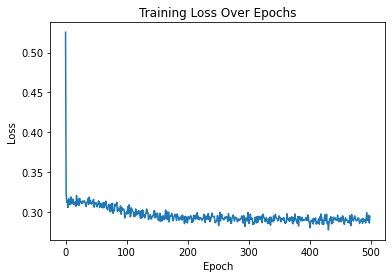

In [8]:
# Plot loss curve
plt.plot(epoch_losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


## Sample from diffusion model and compare with the training data

We will use the sample() method of Diffusion class to sample the points of estimated distribution of diffusion and comapre with the original training distribution. You will see three clusters in the region of training data.

Sampling in batches: 100%|██████████| 100/100 [00:48<00:00,  2.05it/s]


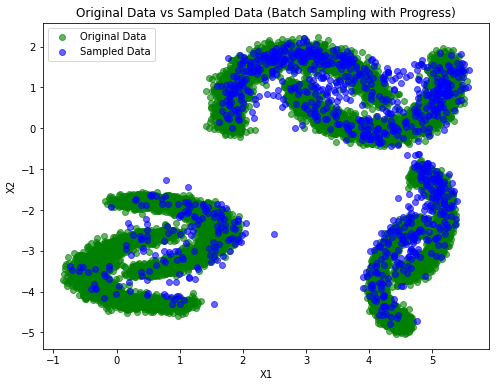

In [9]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

def batch_sample(diffusion, model, total_samples, batch_size, dim, device='cuda'):
    all_samples = []
    model.eval()
    num_batches = total_samples // batch_size

    with torch.no_grad():
        for _ in tqdm(range(num_batches), desc="Sampling in batches"):
            batch_samples = diffusion.sample(model, n=batch_size, dim=dim, device=device)
            all_samples.append(batch_samples.cpu())
    return torch.cat(all_samples, dim=0).numpy()


n_samples_to_generate = 1000
batch_size = 10
dim = 5

# Generate samples in batches
sampled_data = batch_sample(diffusion, model, n_samples_to_generate, batch_size, dim, device=device)

# Plotting the original data and the sampled data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(), label='Original Data', alpha=0.6, color='green')
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], label='Sampled Data', alpha=0.6, color='blue')


plt.title('Original Data vs Sampled Data (Batch Sampling with Progress)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


## Load held-out test data

In [10]:
X = torch.load("test_synthetic-5D.pth")
gt_labels = np.load("test_labels.npy")
print(X.shape)
print(gt_labels.shape)

(15000, 5)
(15000,)


## Sample from diffusion model and compare with the test data

We will use the sample() method of Diffusion class to sample the points of estimated distribution of diffusion and comapre with the test distribution. You will see three clusters in the region of test data.

Sampling in batches: 100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


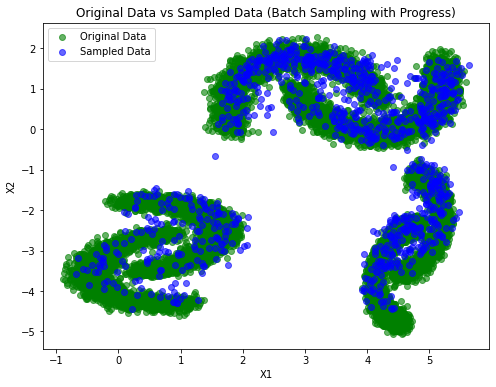

In [11]:
def batch_sample(diffusion, model, total_samples, batch_size, dim, device='cuda'):
    all_samples = []
    model.eval()
    num_batches = total_samples // batch_size

    with torch.no_grad():
        for _ in tqdm(range(num_batches), desc="Sampling in batches"):
            batch_samples = diffusion.sample(model, n=batch_size, dim=dim, device=device)
            all_samples.append(batch_samples.cpu())
    return torch.cat(all_samples, dim=0).numpy()


n_samples_to_generate = 1000
batch_size = 10
dim = 5

# Generate samples in batches
sampled_data = batch_sample(diffusion, model, n_samples_to_generate, batch_size, dim, device=device)

# Plotting the original data and the sampled data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label='Original Data', alpha=0.6, color='green')
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], label='Sampled Data', alpha=0.6, color='blue')


plt.title('Original Data vs Sampled Data (Batch Sampling with Progress)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


## Evaluation metric:

Again sample generated data from the sample() method of Diffusion and use the following metric for evaluation:

**MSE:** Measures the squared differences between each generated sample and its closest match in the hold-out data, giving an overall measure of similarity. You will get between 4.0-4.5

**Cosine Similarity:** Calculates similarity between the vectors of generated and hold-out data, useful for understanding how directionally similar the distributions are in the vector space. You will get between 0.4-0.6

**Average Pairwise Distance:** Computes Euclidean distances between each generated sample and its closest match in the hold-out dataset, offering insight into the spatial distribution similarity. You will get between 0.4-0.6

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, pairwise_distances
from sklearn.metrics import pairwise_distances_argmin_min

def generate_samples(model, diffusion, n_samples, dim, device='cuda'):
    model.eval()
    with torch.no_grad():
        generated_samples = diffusion.sample(model, n=n_samples, dim=dim, device=device)
    return generated_samples.cpu().numpy()

hold_out_data = X


n_test_samples = hold_out_data.shape[0]
generated_data = generate_samples(model, diffusion, n_samples=n_test_samples, dim=5, device=device)


mse_score = mean_squared_error(hold_out_data, generated_data)
print(f'Mean Squared Error (MSE) between hold-out data and generated data: {mse_score:.4f}')


cosine_similarity_score = np.mean(1 - pairwise_distances(hold_out_data, generated_data, metric="cosine"))
print(f'Cosine Similarity (average) between hold-out data and generated data: {cosine_similarity_score:.4f}')

_, distances = pairwise_distances_argmin_min(generated_data, hold_out_data)
avg_distance = np.mean(distances)
print(f'Average Pairwise Euclidean Distance between generated and hold-out data: {avg_distance:.4f}')


Mean Squared Error (MSE) between hold-out data and generated data: 4.2174
Cosine Similarity (average) between hold-out data and generated data: 0.4857
Average Pairwise Euclidean Distance between generated and hold-out data: 0.4184


## Problem 3 Conditional Face Generation Using Diffusion (30 points)
------------------------
In this problem, you will code a diffusion model for conditional face generation.
The goal is to train the model to generate random faces conditioned upon gender.
We use the CelebA dataset, which contains around 200K images of celebrity faces.
The faces are labeled with 40 binary attributes. We will only use the gender attribute for this problem.

Most of the code is already written. You only need to fill in the parts that say "YOUR CODE HERE".

#### References

[1] First modern diffusion paper: https://arxiv.org/abs/2006.11239 (Jonathan Ho et al. Neurips 2020)

[2] Phil Wang's Pytorch implementation: https://github.com/lucidrains/denoising-diffusion-pytorch

You are strongly encouraged to write your own code instead of copy and pasting from existing implementations.

Set the "dataroot" variable to the directory containing all the images

In [13]:
dataroot = "/projectnb/ec523kb/materials/celebA/img_align_celeba/" #  on SCC

In [14]:
# check GPU status
! nvidia-smi

Mon Nov 11 20:50:30 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          On  |   00000000:17:00.0 Off |                    0 |
| N/A   53C    P0             70W /  300W |   61167MiB /  81920MiB |     12%   E. Process |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [15]:
from __future__ import print_function
import os, math
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchvision
from PIL import Image
from copy import deepcopy

# The CelebA dataset contains 40 binary attribute labels for each image
attributes = ['5_o_Clock_Shadow', 'Arched_Eyebrows',
 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
 'Big_Lips', 'Big_Nose', 'Black_Hair',
 'Blond_Hair', 'Blurry', 'Brown_Hair',
 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup',
 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face',
 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair',
 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat',
 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie',
 'Young']

def set_random_seed(seed=999):
    # Set random seed for reproducibility
    print("Random Seed: ", seed)
    random.seed(seed)
    torch.manual_seed(seed)

This class handles reading the data from disk.

In [16]:
class CelebADataset(torch.utils.data.Dataset):
    def __init__(self, transform = None):
        '''Initialize the dataset.'''
        self.transform = transform
        self.root = dataroot
        self.attr_txt = dataroot + 'list_attr_celeba.txt'
        self._parse()

    def _parse(self):
        '''
        Parse the celeba text file.
        Pupulate the following private variables:
         - self.ys: A list of 1D tensors with 40 binary attribute labels.
         - self.im_paths: A list of strings (image paths).
        '''
        self.im_paths = [] # list of jpeg filenames
        self.ys = []       # list of attribute labels

        def _to_binary(lst):
            return torch.tensor([0 if lab == '-1' else 1 for lab in lst])

        with open(self.attr_txt) as f:
            for line in f:
                assert len(line.strip().split()) == 41
                fl = line.strip().split()
                if fl[0][-4:] == '.jpg': # if not header
                    self.im_paths.append(self.root + fl[0]) # jpeg filename
                    self.ys.append(_to_binary(fl[1:]))      # 1D tensor of 40 binary attributes

    def __len__(self):
        '''Return length of the dataset.'''
        return len(self.ys)

    def __getitem__(self, index):
        '''
        Return the (image, attributes) tuple.
        This function gets called when you index the dataset.
        '''
        def img_load(index):
            imraw = Image.open(self.im_paths[index])
            im = self.transform(imraw)
            return im

        target = self.ys[index]
        return img_load(index), target

The next few code blocks implement the **denoising autoencoder**. At each timestep, the autoencoder **predicts the noise component of the noisy image.** In problem 1, we called this function $\epsilon_{\theta}(x_t, t)$. It takes an image $x_t$ and an integer $t$ as input and outputs an image.

For this problem, we will also add a binary input corresponding to the gender of the face. Let's call this binary label $y$, so the denoising autoencoder $\epsilon_{\theta}(x_t, t, y)$ takes three inputs in this problem.

$\epsilon_{\theta}$ is implemented as a UNet (reference https://arxiv.org/abs/1505.04597 Figure 1). The UNet was originally developed for image segmentation, but is useful for any image-to-image translation task. The UNet is built from downsampling and upsampling modules (implemented as "Up" and "Down" classes below). These modules are built from a fairly standard convolutional block, implemented as class "Block" below. This type of convolutional block is commonly used in vision models (such as ResNets and Stable Diffusion). Recently, most state-of-the-art vision models add in attention layers. We won't use attention here because they are slow and not necessary for this assignment.

The vanilla UNet is unconditional, so **you need to make some modifications to inject the time and gender conditionings $t$ and $y$.** The time conditioning is implemented using the standard sinusoidal positional embedding from the well-kown transformer paper (https://arxiv.org/pdf/1706.03762.pdf). The gender conditioning is implemented using two learnable embedding vectors (one for female faces, and one for male faces).

## Problem 3.1 Conditional UNet (10 Points)
-------------------
In this part, we implement the conditional UNet. Most of the code is written. Please fill in the parts that are missing according to the descriptions.

In [ ]:
def nonlinearity(x):
    ''' Also called the activation function. '''
    # swish
    return x*torch.sigmoid(x)
    # Swish is similar to GeLU. People tend to use this more than ReLU nowadays.

class Block(nn.Module):
    '''
    This implements a residual block.
    It has a similar structure to the residual block used in ResNets,
    but there are a few modern modifications:
     - Different order of applying weights, activations, and normalization.
     - Swish instead of ReLU activation.
     - GroupNorm instead of BatchNorm.
    We also need to add the conditional embedding.

    '''
    def __init__(self, in_channels, out_channels, emb_dim=256):
        '''
        in_channels: Number of image channels in input.
        out_channels: Number of image channels in output.
        emb_dim: Length of conditional embedding vector.
        '''
        super().__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.norm1 = nn.GroupNorm(1, in_channels)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False)

        ################## YOUR CODE HERE ##################
        # Instantiate a linear layer.
        # The layer should have input dimension emb_dim and
        # output dimension out_channels.
        # Store the linear layer in a variable called self.proj
        self.proj = nn.Linear(emb_dim, out_channels)
        ####################################################
        #So in the conversation with Professor and TA shantanu in class on 11 November I asked him that if the 
        # block is too small and professor told me to try with a conv2 and a shortcut and also TA shantanu he 
        #checked the working code and i guess by mistake the 2nd conv and a shortcut was missing here so added 
        # that in order to make the code run properly :).
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0)


    def forward(self, x, t):
        '''
        h and x have dimension B x C x H x W,
        where B is batch size,
              C is channel size,
              H is height,
              W is width.
        t is the conditional embedding.
        t has dimension B x V,
        where V is the embedding dimension.
        '''
        h = x
        h = self.norm1(h)
        h = nonlinearity(h)
        h = self.conv1(h)

        ################## YOUR CODE HERE ##################
        # Add conditioning to the hidden feature map h here
        # by adding a linear projection of the conditional embedding t.
        # (1) Start with t, which has dimension B x V,
        #    where B is batch size and V is embedding size.
        # (2) Pass t through the linear layer self.proj
        #    The resulting variable has dimenion B x C,
        #    where C is the number of image channels in h.
        # (3) Pass the result through the swish nonlinearity.
        # (4) Add the result to h.
        #    keep in mind that h has dimension B x C x H x W,
        #    where H  and W are the height and width of the feature map.
        #    The conditioning should be constant across the H and W dimensions.
        h = h + nonlinearity(self.proj(t))[:,:,None,None]
        ####################################################

        # Add conditioning to the hidden feature map h
        # (1) Linear projection of the conditional embedding t

        # (3) Reshape for broadcasting across H and W dimensions
        # t_proj is reshaped to B x C x 1 x 1 so that it can be broadcasted

        # (3) Add the conditioning to h
        h = nonlinearity(h)
        h = self.conv2(h)

        if self.in_channels != self.out_channels:
            x = self.shortcut(x)

        return x+h

The "Up" and "Down" classes implement the upsampling and downsampling blocks. These are given to you.

In [18]:
class Down(nn.Module):
    ''' Downsampling block.'''
    def __init__(self, in_channels, out_channels):
        '''
        This block downsamples the feature map size by 2.
        in_channels: Number of image channels in input.
        out_channels: Number of image channels in output.
        '''
        super().__init__()
        self.pool = nn.MaxPool2d(2)
        self.conv = Block(in_channels, out_channels)

    def forward(self, x, t):
        ''' x is the feature maps; t is the conditional embeddings. '''
        x = self.pool(x) # The max pooling decreases feature map size by factor of 2
        x = self.conv(x, t)
        return x

class Up(nn.Module):
    ''' Upsampling block.'''
    def __init__(self, in_channels, out_channels):
        '''
        This block upsamples the feature map size by 2.
        in_channels: Number of image channels in input.
        out_channels: Number of image channels in output.
        '''
        super().__init__()
        self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.conv = Block(in_channels, out_channels)

    def forward(self, x, skip_x, t):
        '''
        x is the feature maps;
        skip_x is the skipp connection feature maps;
        t is the conditional embeddings.
        '''
        x = self.up(x) # The upsampling increases the feature map size by factor of 2
        x = torch.cat([skip_x, x], dim=1) # concatentate skip connection
        x = self.conv(x, t)
        return x

The UNet class implements a conditional UNet. This is done for you.

In [19]:
class UNet(nn.Module):
    ''' UNet implementation of a denoising auto-encoder.'''
    def __init__(self, c_in=3, c_out=3, conditional=True, emb_dim=256):
        '''
        c_in: Number of image channels in input.
        c_out: Number of image channels in output.
        emb_dim: Length of conditional embedding vector.
        '''
        super().__init__()
        self.emb_dim = emb_dim
        self.inc = Block(c_in, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 256)

        self.bot1 = Block(256, 512)
        self.bot2 = Block(512, 512)
        self.bot3 = Block(512, 512)
        self.bot4 = Block(512, 256)

        self.up1 = Up(512, 128)
        self.up2 = Up(256, 64)
        self.up3 = Up(128, 64)
        self.outc = nn.Conv2d(64, c_out, kernel_size=1)

        # nn.Embedding implements a dictionary of num_classes prototypes
        self.conditional = conditional
        if conditional:
            num_classes = 2

            self.gender_vectors = nn.Parameter(torch.randn(num_classes, emb_dim))



    def temporal_encoding(self, timestep):
        '''
        This implements the sinusoidal temporal encoding for the current timestep.
        Input timestep is a tensor of length equal to the batch size
        Output emb is a 2D tensor B x V,
            where V is the embedding dimension.
        '''
        assert len(timestep.shape) == 1
        half_dim = self.emb_dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -emb)
        emb = emb.to(device=timestep.device)
        emb = timestep.float()[:, None] * emb[None, :]
        emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
        if self.emb_dim % 2 == 1:  # zero pad
            emb = torch.nn.functional.pad(emb, (0,1,0,0))
        return emb

    def unet_forward(self, x, t):
        # x: B x 3 x 224 x 224
        x1 = self.inc(x, t)    # x1: B x 64 x 64 x 64
        x2 = self.down1(x1, t) # x2: B x 128 x 32 x 32
        x3 = self.down2(x2, t) # x3: B x 256 x 16 x 16
        x4 = self.down3(x3, t) # x3: B x 256 x 8 x 8

        x4 = self.bot1(x4, t) # x4: B x 512 x 8 x 8
        # Removing bot2 and bot3 can save some time at the expense of quality
        x4 = self.bot2(x4, t) # x4: B x 512 x 8 x 8
        x4 = self.bot3(x4, t) # x4: B x 512 x 8 x 8
        x4 = self.bot4(x4, t) # x4: B x 256 x 8 x 8

        x = self.up1(x4, x3, t) # x: B x 128 x 16 x 16
        x = self.up2(x, x2, t)  # x: B x 64 x 32 x 32
        x = self.up3(x, x1, t)  # x: B x 64 x 64 x 64
        output = self.outc(x)   # x: B x 3 x 64 x 64
        return output

    def forward(self, x, t, y=None):
        '''
        x: image input
        t: integer timestep
        y: binary conditioning
        Return denoised image conditioned on the timestep t and
            class label y.
        '''
        if self.conditional:

            # Sinusoidal temporal encoding
            temp_emb = self.temporal_encoding(t)

            # Selecting gender vector based on y
            gender_emb = self.gender_vectors[y]

            # Combining temporal and gender embeddings
            c = temp_emb + gender_emb

        else:
            c = self.temporal_encoding(t)
        return self.unet_forward(x, c)

## Problem 3.2 Implementing Diffusion (10 Points)
-----------------------
In this part, you will implement the diffusion process you derived in problem 1.

Here is a summary of all the math you need for your convenience:

**Hyperparameters:** $T$ is the number of diffusion timesteps. We use 1000. $\{ \beta_1, ... , \beta_T \}$ are hyperparameters indicating the variances at each timestep. We set $\beta_1 = 1 \times 10^{-4}$ and $\beta_{1000} = 0.02$. $\beta_t$ increases linearly w.r.t. $t$. The $\beta$ values are fairly standard in the literature, so you don't need to tune them.

**Some intermediate notations:**

$$\alpha_t = 1 - \beta_t$$
$$\bar{\alpha_t} = \prod^t_{s=1} \alpha_s$$

**For training** (you need this for the "get_noisy_image" function):

$$x_t(x_0, \epsilon) = \sqrt{\bar{\alpha_t}} x_0 + \sqrt{ 1- \bar{\alpha_t} }\epsilon$$

where $\epsilon \sim \mathbf{N} (\mathbf{0}, \mathbf{I})$.

**For generating faces** (evaluation), you will need this (this is for the "sample" function):

$$ \mu_{\theta}(x_t, t) = \frac{1}{\sqrt{\alpha_t}}\left( x_t - \frac{\beta_t}{\sqrt{ 1- \bar{\alpha_t} }}\epsilon_{\theta}(x_t, t)\right) $$

$$p(x_{t-1} | x_t) \sim \mathbf{N}(x_{t-1} ; \mu_{\theta} ( x_t, t), \sigma_t^2 \mathbf{I})$$

Note that we will use $\sigma_t^2 = \beta_t$. There is no robust justification for this. It works fine in practice and spares us the trouble of learning the variances of $p(x_{t-1} | x_t)$. Note that $\epsilon_{\theta}(x_t, t)$ is the output of the "model". In this problem, we also condition on the gender label, so you also need to pass the gender labels $y$ to the model.

Note on variances: When you multiply a random variable by $a$, you multiply its variance by $a^2$. Just keep that in mind.

In [20]:
class Diffusion:
    '''
    Implements the Diffusion process,
    including both training and sampling.
    '''
    def __init__(self, num_timesteps=1000, beta_start=1e-4, beta_end=0.02, img_size=64, device="cuda"):
        self.num_timesteps = num_timesteps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.img_size = img_size
        self.device = device

        ################## YOUR CODE HERE ##################
        # Here you should instantiate a 1D vector called self.beta,
        # which contains the \beta_t values
        # We use 1000 time steps, so t = 1:1000
        # \beta_1 = 1e-4
        # \beta_1000 = 0.02
        # The value of beta should increase linearly w.r.t. the value of t.
        #
        # Additionally, it may be helpful to pre-calculate the values of
        # \alpha_t and \bar{\alpha}_t here, since you'll use them often.
        self.beta = torch.linspace(self.beta_start, self.beta_end, self.num_timesteps).to(device)
        self.alpha = 1. - self.beta
        self.alpha_hat = torch.cumprod(self.alpha, dim=0)

        ####################################################

    def get_noisy_image(self, x_0, t):
        '''
        This function is only used for training.

        x_0: The input image. Dimensions: B x 3 x H x W
        t: A 1D vector of length B representing the desired timestep
          B is the batch size.
          H and W are the height and width of the input image.

        This function returns a *tuple of TWO tensors*:
            (x_t, epsilon)
            both have dimensions B x 3 x H x W
        '''
        ################## YOUR CODE HERE ##################
        # Calculate x_t from x_0 and t based on the equation you derived in problem 1.
        # Remember that \epsilon in the equation is noise drawn from
        # a standard normal distribution.
        # *** Return BOTH x_t and \epsilon as a tuple ***.
        sqrt_alpha_hat = torch.sqrt(self.alpha_hat[t])[:, None, None, None]
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alpha_hat[t])[:, None, None, None]
        eps = torch.randn_like(x_0)
        
        return sqrt_alpha_hat * x_0 + sqrt_one_minus_alpha_hat * eps, eps

        ####################################################

    def sample(self, model, n, y=None):
        '''
        This function is used  to generate images.

        model: The denoising auto-encoder \epsilon_{\theta}
        n: The number of images you want to generate
        y: A 1D binary vector of size n indicating the
            desired gender for the generated face.
        '''
        model.eval()
        with torch.no_grad():
            ################## YOUR CODE HERE ##################
            # Write code for the sampling process here.
            # This process starts with x_T and progresses to x_0, T=1000
            # Reference *Algorithm 2* in "Denoising Diffusion Probabilistic Models" by Jonathan Ho et al.
            #
            # Start with x_T drawn from the standard normal distribution.
            # x_T has dimensions n x 3 x H x W.
            # H = W = 64 are the dimensions of the image for this assignment.
            #
            # Then for t = 1000 -> 1
            #     (1) Call the model to calculate \epsilon_{\theta}(x_t, t)
            #     (2) Use the formula from above to calculate \mu_{\theta} from \epsilon_{\theta}
            #     (3) Add zero-mean Gaussian noise with variance \beta_t to \mu_{\theta}
            #         this yields x_{t-1}
            #
            # Skip step (3) if t=1, because x_0 is the final image. It makes no sense to add noise to
            # the final product.
            x = torch.randn((n, 3, self.img_size, self.img_size)).to(self.device)
            
            for i in tqdm(reversed(range(1, self.num_timesteps)), position=0):
                t = (torch.ones(n) * i).long().to(self.device)
                predicted_noise = model(x, t, y) ###
                
                alpha = self.alpha[t][:, None, None, None]
                alpha_hat = self.alpha_hat[t][:, None, None, None]
                beta = self.beta[t][:, None, None, None]
                
                if i > 1:
                    noise = torch.randn_like(x)
                else:
                    noise = torch.zeros_like(x)
                
                x = 1 / torch.sqrt(alpha) * (x - ((1 - alpha) / (torch.sqrt(1 - alpha_hat))) * predicted_noise) + torch.sqrt(beta) * noise


            ####################################################

        model.train()
        x = (x.clamp(-1, 1) + 1) / 2
        x = (x * 255).type(torch.uint8)
        return x

def show_images(images, **kwargs):
    plt.figure(figsize=(10, 10), dpi=80)
    grid = torchvision.utils.make_grid(images, **kwargs)
    ndarr = grid.permute(1, 2, 0).to('cpu').numpy()
    im = Image.fromarray(ndarr)
    plt.imshow(im)
    plt.show()

## Problem 3.3 Training Conditional Diffusion (10 Points)
------------
In this part, you will train the diffusion model.

The first code block implements a helper class called "EMA". This class handles the exponentially weighted averaging of the denoising autoencoder. During training we will keep around an averaged version of the autoencoder for evaluation. When generating images, we always use an autoencoder that is averaged across training iterations. This leads to higher image quality, because the autoencoder at each training iteration can be unstable.

In [21]:
class EMA:
    '''
    This class implements the Expontial Moving Average (EMA) for model weights.
    Only used for evaluation.
    Using the EMA averaged model increases the quality of generated images.
    '''
    def __init__(self, beta=0.995):
        '''
        beta is a hyperparameter.
        New model weights = beta * (old model weights) +
                            (1 - beta) * (new model weights)
        '''
        super().__init__()
        self.beta = beta

    def step_ema(self, ma_model, current_model):
        '''
        ma_model: the averaged model we will use for evaluation
        current_model: The model being explicitly trained
        This function updates the weights of ma_model. Return None.
        '''
        for current_params, ma_params in zip(current_model.parameters(), ma_model.parameters()):
            old_weight, up_weight = ma_params.data, current_params.data
            ma_params.data = self.update_average(old_weight, up_weight)

    def update_average(self, old, new):
        '''Private function used to update individual parameters.'''
        return old * self.beta + (1 - self.beta) * new

The following code prepares some parameters for training.

In [22]:
# We will resize to 64 x 64 for this assignment
image_size = 64

# Hyperparameters
batch_size = 64
learning_rate = 0.0002
weight_decay = 0.00001 # (L2 penalty)

# Transform used for training
train_transform = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5),
                                                    (0.5, 0.5, 0.5)),
                           ])

# Make the dataset
dataset = CelebADataset(transform=train_transform)

# index of the binary attribute for gender
gender_index = attributes.index('Male')

# Run on GPU
device = 'cuda'

This is the main training loop. We only ask you to fill in the loss function. class ```Diffusion``` is implemented in previous question.

The loss function (same as problem 1, just with a different scaling) is:

$$\tilde{L} = \mathbb{E}_{x_0, \epsilon, t} \left[  \frac{1}{S} \left\|  \epsilon - \epsilon_{\theta}(x_t(x_0, \epsilon), t) \right\|^2 \right] $$

where $S$ is the number of dimensions in the images $\epsilon$.

The given code iterates through the entire dataset 10 times. At the end of each epoch, it should display a row of 8 generated faces (4 female and 4 male).

If you implement everything correctly, the default hyperparameters should work, but you are welcome to tune the learning rate, weight decay, batch size and EMA beta value.

**At the end of training, display a grid of 64 faces (half male and half female).** They should look reasonable.

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 0


/share/pkg.7/pytorch/1.9.0/install/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 3166/3166 [02:31<00:00, 20.86it/s, LR=0.0002, MSE=0.0268] 
14it [00:00, 139.18it/s]

Random Seed:  999


999it [00:05, 170.93it/s]


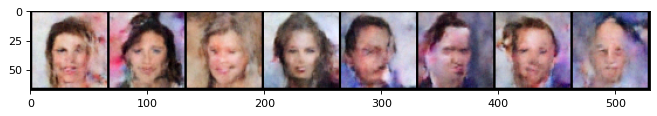

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 1


100%|██████████| 3166/3166 [02:38<00:00, 19.96it/s, LR=0.0002, MSE=0.0157] 
17it [00:00, 168.27it/s]

Random Seed:  999


999it [00:05, 171.35it/s]


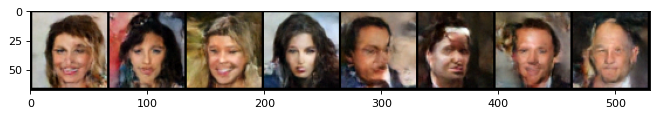

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 2


100%|██████████| 3166/3166 [02:38<00:00, 19.97it/s, LR=0.0002, MSE=0.0147] 
17it [00:00, 167.27it/s]

Random Seed:  999


999it [00:05, 170.08it/s]


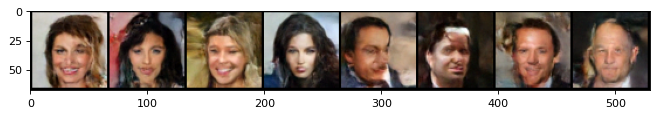

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 3


100%|██████████| 3166/3166 [02:38<00:00, 20.01it/s, LR=0.0002, MSE=0.0141] 
17it [00:00, 168.42it/s]

Random Seed:  999


999it [00:05, 170.12it/s]


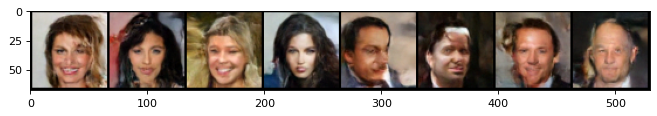

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 4


100%|██████████| 3166/3166 [02:38<00:00, 19.94it/s, LR=0.0002, MSE=0.0135] 
17it [00:00, 166.99it/s]

Random Seed:  999


999it [00:05, 170.51it/s]


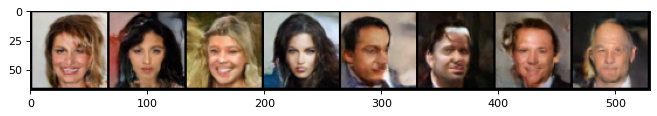

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 5


100%|██████████| 3166/3166 [02:40<00:00, 19.68it/s, LR=0.0002, MSE=0.0131] 
17it [00:00, 167.25it/s]

Random Seed:  999


999it [00:05, 170.25it/s]


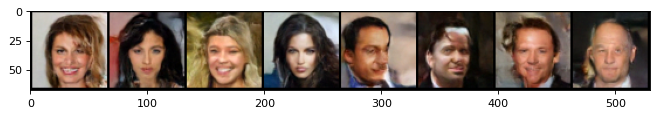

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 6


100%|██████████| 3166/3166 [02:41<00:00, 19.59it/s, LR=0.0002, MSE=0.0128] 
17it [00:00, 166.76it/s]

Random Seed:  999


999it [00:05, 169.00it/s]


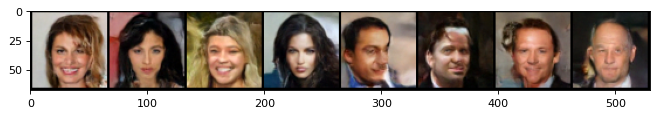

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 7


100%|██████████| 3166/3166 [02:41<00:00, 19.56it/s, LR=0.0002, MSE=0.0124] 
17it [00:00, 165.75it/s]

Random Seed:  999


999it [00:05, 168.26it/s]


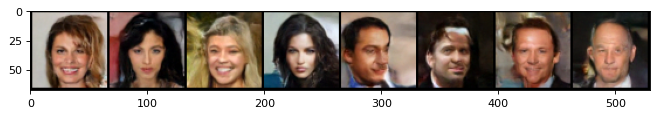

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 8


100%|██████████| 3166/3166 [02:41<00:00, 19.58it/s, LR=0.0002, MSE=0.0121] 
17it [00:00, 168.71it/s]

Random Seed:  999


999it [00:05, 170.26it/s]


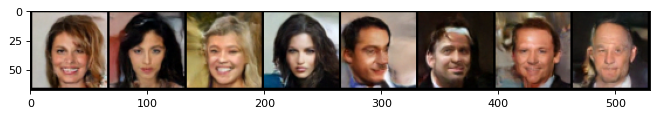

  0%|          | 0/3166 [00:00<?, ?it/s]

epoch: 9


100%|██████████| 3166/3166 [02:41<00:00, 19.57it/s, LR=0.0002, MSE=0.0118] 
17it [00:00, 168.19it/s]

Random Seed:  999


999it [00:05, 168.83it/s]


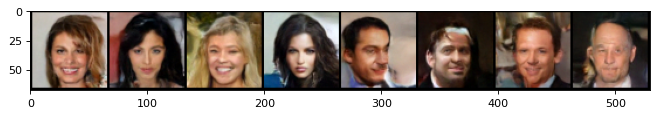

In [23]:
# func to show_images
def show_images(images, **kwargs):
    plt.figure(figsize=(10, 10), dpi=80)
    grid = torchvision.utils.make_grid(images, **kwargs)
    ndarr = grid.permute(1, 2, 0).to('cpu').numpy()
    im = Image.fromarray(ndarr)
    plt.imshow(im)
    plt.show()

# Instantiate denoising autoencoder
model = UNet().to(device)

# ema_model is the averaged model that we'll use for sampling
ema_model = deepcopy(model)

# ema is the helper for updaing EMA weights
ema = EMA()

# Dataloader
trainloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=8)

# Mixed precision floating point arithmetic can speed up training on some GPUs
scaler = torch.cuda.amp.GradScaler()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

############### YOUR CODE HERE ############
# Loss function to train denoising autoencoder
criterion = nn.MSELoss()
####################################################

# Diffusion wrapper
diffusion = Diffusion(img_size=image_size, device=device)

for epoch in range(10):
    print('epoch:', epoch)
    pbar = tqdm(trainloader)
    for images, y in pbar:
        y = y[:,gender_index].view(-1).cuda()

        with torch.cuda.amp.autocast(enabled=True):
            images = images.to(device)

            ################## YOUR CODE HERE ##################
            # sample a batch of random integers uniformly
            # from interval [1, diffusion.num_timesteps)
            t = torch.randint(low=1, high=diffusion.num_timesteps, size=(images.shape[0],)).to(device)
            x_t, noise = diffusion.get_noisy_image(images, t)
            
            predicted_noise = model(x_t, t, y)
            ####################################################

            ################## YOUR CODE HERE ##################
            # Use the mean squared error loss to optimize the predicted_noise
            # towards the true noise.
            loss = criterion(noise, predicted_noise)
            ####################################################

        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        pbar.set_postfix(MSE=loss.item(), LR=optimizer.param_groups[0]['lr'])

        # update EMA model. First epoch of training is too noisy,
        # so we only do this after the first epoch
        if epoch > 0:
            ema.step_ema(ema_model, model)

    if epoch == 0:
        ema_model = deepcopy(model)

    set_random_seed() # set random seed to generate the same style face. This is handy for comparing across epochs.
    # n is number of images you want to generate
    sampled_images = diffusion.sample(ema_model, n=8, y=torch.tensor([0,0,0,0,1,1,1,1]).cuda())
    show_images(sampled_images)

Generate a grid of 64 faces (half male and half female).

In [24]:
set_random_seed()
y_gender = torch.cat((torch.zeros(32, dtype=torch.long), torch.ones(32, dtype=torch.long)))
sampled_images = diffusion.sample(ema_model, n=64, y=y_gender.cuda())

6it [00:00, 53.53it/s]

Random Seed:  999


999it [00:20, 47.59it/s]


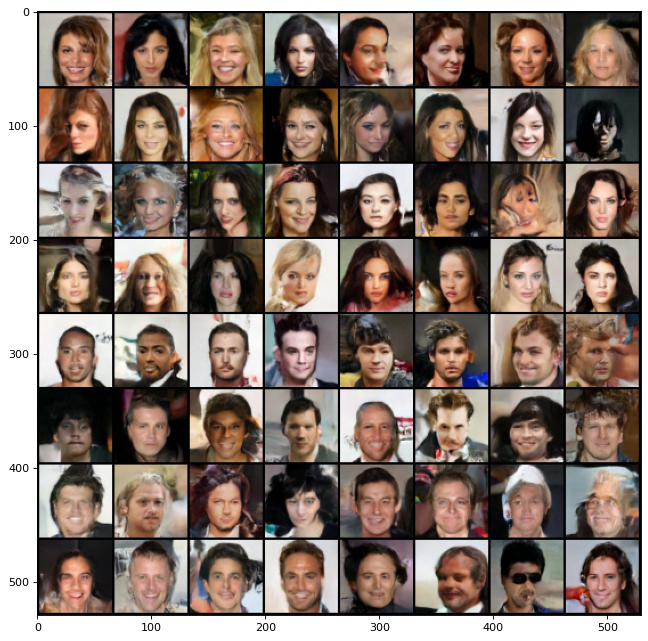

In [25]:
show_images(sampled_images)